In [325]:
#Mod1
import math
from pathlib import Path
from zipfile import ZipFile
from tempfile import TemporaryDirectory

import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
from chembl_webresource_client.new_client import new_client
from tqdm.auto import tqdm

In [326]:
HERE = Path(_dh[-1])
DATA = HERE / "data"

In [327]:
targets_api = new_client.target
compounds_api = new_client.molecule
bioactivities_api = new_client.activity

In [328]:
type(targets_api)

chembl_webresource_client.query_set.QuerySet

In [329]:
uniprot_id = "P00533"

In [330]:
#Fetch target data from ChEMBL
# Get target information from ChEMBL but restrict it to specified values only
targets = targets_api.get(target_components__accession=uniprot_id).only(
    "target_chembl_id", "organism", "pref_name", "target_type"
)
print(f'The type of the targets is "{type(targets)}"')

The type of the targets is "<class 'chembl_webresource_client.query_set.QuerySet'>"


In [331]:
#OR this 
# Target search for coronavirus
target = new_client.target
target_query = target.search('mutant p53 proteins')
targets = pd.DataFrame.from_dict(target_query)
targets


AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

                                       cross_references  \
0     [{'xref_id': 'P04637', 'xref_name': None, 'xre...   
1     [{'xref_id': 'P02340', 'xref_name': None, 'xre...   
2                                                    []   
3                                                    []   
4                                                    []   
...                                                 ...   
4371                                                 []   
4372                                                 []   
4373                                                 []   
4374                                                 []   
4375                                                 []   

                   organism  \
0              Homo sapiens   
1              Mus musculus   
2              Homo sapiens   
3              Homo sapiens   
4              Homo sapiens   
...                     ...   
4371           Mus musculus   
4372           Homo sapiens   
4373       E

In [332]:
#Download target data from ChEMBL
targets = pd.DataFrame.from_records(targets)
targets
# Save filtered data
targets.to_csv(DATA / "TP53_Target_Serach_Results.csv")
targets.head()

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

                                    cross_references      organism  \
0  [{'xref_id': 'P04637', 'xref_name': None, 'xre...  Homo sapiens   
1  [{'xref_id': 'P02340', 'xref_name': None, 'xre...  Mus musculus   
2                                                 []  Homo sapiens   
3                                                 []  Homo sapiens   
4                                                 []  Homo sapiens   

                                pref_name  score  species_group_flag  \
0              Cellular tumor antigen p53   17.0               False   
1              Cellular tumor antigen p53   16.0               False   
2      Tumour suppressor protein p53/Mdm4   16.0               False   
3  Tumour suppressor p53/oncoprotein Mdm2   15.0               False   
4                CREB-binding protein/p53   15.0               False   

  target_chembl_id                                  target_components  \
0       CHEMBL4096  [{'accession': 'P04637', 'component_descriptio...   


In [333]:
#Select target (target ChEMBL ID)
target = targets.iloc[3]
target

cross_references                                                     []
organism                                                   Homo sapiens
pref_name                        Tumour suppressor p53/oncoprotein Mdm2
score                                                              15.0
species_group_flag                                                False
target_chembl_id                                          CHEMBL1907611
target_components     [{'accession': 'P04637', 'component_descriptio...
target_type                                 PROTEIN-PROTEIN INTERACTION
tax_id                                                           9606.0
Name: 3, dtype: object

In [334]:
chembl_id = target.target_chembl_id
print(f"The target ChEMBL ID is {chembl_id}")
# NBVAL_CHECK_OUTPUT

The target ChEMBL ID is CHEMBL1907611


In [335]:
#Get bioactivity data
bioactivities = bioactivities_api.filter(
    target_chembl_id=chembl_id, type="IC50", relation="=", assay_type="B"
).only(
    "activity_id",
    "assay_chembl_id",
    "assay_description",
    "assay_type",
    "molecule_chembl_id",
    "type",
    "standard_units",
    "relation",
    "standard_value",
    "target_chembl_id",
    "target_organism",
)

print(f"Length and type of bioactivities object: {len(bioactivities)}, {type(bioactivities)}")

Length and type of bioactivities object: 1464, <class 'chembl_webresource_client.query_set.QuerySet'>


In [336]:
print(f"Length and type of first element: {len(bioactivities[0])}, {type(bioactivities[0])}")
bioactivities[0]

Length and type of first element: 13, <class 'dict'>


{'activity_id': 1424130,
 'assay_chembl_id': 'CHEMBL828042',
 'assay_description': 'Inhibitory concentration against MDM2-p53 interaction in SJSA human sarcoma cells',
 'assay_type': 'B',
 'molecule_chembl_id': 'CHEMBL179549',
 'relation': '=',
 'standard_units': 'nM',
 'standard_value': '27000.0',
 'target_chembl_id': 'CHEMBL1907611',
 'target_organism': 'Homo sapiens',
 'type': 'IC50',
 'units': 'uM',
 'value': '27.0'}

In [337]:
#Download bioactivity data from ChEMBL
bioactivities_df = pd.DataFrame.from_records(bioactivities)
print(f"DataFrame shape: {bioactivities_df.shape}")
bioactivities_df.head()
# Save data
bioactivities_df.to_csv(DATA / "TP53_bioactivities_data_raw.csv")
bioactivities_df.head()

DataFrame shape: (1465, 13)


AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

   activity_id assay_chembl_id  \
0      1424130    CHEMBL828042   
1      1424130    CHEMBL828042   
2      1424131    CHEMBL828042   
3      1424132    CHEMBL828042   
4      1424135    CHEMBL828042   

                                   assay_description assay_type  \
0  Inhibitory concentration against MDM2-p53 inte...          B   
1  Inhibitory concentration against MDM2-p53 inte...          B   
2  Inhibitory concentration against MDM2-p53 inte...          B   
3  Inhibitory concentration against MDM2-p53 inte...          B   
4  Inhibitory concentration against MDM2-p53 inte...          B   

  molecule_chembl_id relation standard_units standard_value target_chembl_id  \
0       CHEMBL179549        =             nM        27000.0    CHEMBL1907611   
1       CHEMBL179549        =             nM        27000.0    CHEMBL1907611   
2       CHEMBL360920        =             nM        66000.0    CHEMBL1907611   
3       CHEMBL182052        =             nM        90000.0    CHEMBL190

In [338]:
bioactivities_df["units"].unique()

array(['uM', 'microM', 'nM', 'mM', 'nmol/L'], dtype=object)

In [339]:
bioactivities_df.drop(["units", "value"], axis=1, inplace=True)
bioactivities_df.head()

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

   activity_id assay_chembl_id  \
0      1424130    CHEMBL828042   
1      1424130    CHEMBL828042   
2      1424131    CHEMBL828042   
3      1424132    CHEMBL828042   
4      1424135    CHEMBL828042   

                                   assay_description assay_type  \
0  Inhibitory concentration against MDM2-p53 inte...          B   
1  Inhibitory concentration against MDM2-p53 inte...          B   
2  Inhibitory concentration against MDM2-p53 inte...          B   
3  Inhibitory concentration against MDM2-p53 inte...          B   
4  Inhibitory concentration against MDM2-p53 inte...          B   

  molecule_chembl_id relation standard_units standard_value target_chembl_id  \
0       CHEMBL179549        =             nM        27000.0    CHEMBL1907611   
1       CHEMBL179549        =             nM        27000.0    CHEMBL1907611   
2       CHEMBL360920        =             nM        66000.0    CHEMBL1907611   
3       CHEMBL182052        =             nM        90000.0    CHEMBL190

In [340]:
#Preprocess and filter bioactivity data
#1. Convert datatype of "standard_value" from "object" to "float"
bioactivities_df.dtypes
bioactivities_df = bioactivities_df.astype({"standard_value": "float64"})
bioactivities_df.dtypes

activity_id             int64
assay_chembl_id        object
assay_description      object
assay_type             object
molecule_chembl_id     object
relation               object
standard_units         object
standard_value        float64
target_chembl_id       object
target_organism        object
type                   object
dtype: object

In [341]:
#2. Delete entries with missing values
bioactivities_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (1465, 11)


In [342]:
#3. Keep only entries with "standard_unit == nM"
print(f"Units in downloaded data: {bioactivities_df['standard_units'].unique()}")
print(
    f"Number of non-nM entries:\
    {bioactivities_df[bioactivities_df['standard_units'] != 'nM'].shape[0]}"
)

Units in downloaded data: ['nM']
Number of non-nM entries:    0


In [343]:
bioactivities_df = bioactivities_df[bioactivities_df["standard_units"] == "nM"]
print(f"Units after filtering: {bioactivities_df['standard_units'].unique()}")

Units after filtering: ['nM']


In [344]:
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (1465, 11)


In [345]:
#4. Delete duplicate molecules
bioactivities_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (1225, 11)


In [346]:
#5. Reset "DataFrame" index
bioactivities_df.reset_index(drop=True, inplace=True)
bioactivities_df.head()

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

   activity_id assay_chembl_id  \
0      1424130    CHEMBL828042   
1      1424131    CHEMBL828042   
2      1424132    CHEMBL828042   
3      1424135    CHEMBL828042   
4      1424136    CHEMBL828042   

                                   assay_description assay_type  \
0  Inhibitory concentration against MDM2-p53 inte...          B   
1  Inhibitory concentration against MDM2-p53 inte...          B   
2  Inhibitory concentration against MDM2-p53 inte...          B   
3  Inhibitory concentration against MDM2-p53 inte...          B   
4  Inhibitory concentration against MDM2-p53 inte...          B   

  molecule_chembl_id relation standard_units  standard_value target_chembl_id  \
0       CHEMBL179549        =             nM         27000.0    CHEMBL1907611   
1       CHEMBL360920        =             nM         66000.0    CHEMBL1907611   
2       CHEMBL182052        =             nM         90000.0    CHEMBL1907611   
3       CHEMBL179662        =             nM         85000.0    CHEM

In [347]:
#6. Rename columns
bioactivities_df.rename(
    columns={"standard_value": "IC50", "standard_units": "units"}, inplace=True
)
bioactivities_df.head()
# Save data
bioactivities_df.to_csv(DATA / "TP53_filtered_data.csv")
bioactivities_df.head()

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

   activity_id assay_chembl_id  \
0      1424130    CHEMBL828042   
1      1424131    CHEMBL828042   
2      1424132    CHEMBL828042   
3      1424135    CHEMBL828042   
4      1424136    CHEMBL828042   

                                   assay_description assay_type  \
0  Inhibitory concentration against MDM2-p53 inte...          B   
1  Inhibitory concentration against MDM2-p53 inte...          B   
2  Inhibitory concentration against MDM2-p53 inte...          B   
3  Inhibitory concentration against MDM2-p53 inte...          B   
4  Inhibitory concentration against MDM2-p53 inte...          B   

  molecule_chembl_id relation units     IC50 target_chembl_id target_organism  \
0       CHEMBL179549        =    nM  27000.0    CHEMBL1907611    Homo sapiens   
1       CHEMBL360920        =    nM  66000.0    CHEMBL1907611    Homo sapiens   
2       CHEMBL182052        =    nM  90000.0    CHEMBL1907611    Homo sapiens   
3       CHEMBL179662        =    nM  85000.0    CHEMBL1907611    Hom

In [348]:
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (1225, 11)


In [349]:
#Fetch compound data from ChEMBL
compounds_provider = compounds_api.filter(
    molecule_chembl_id__in=list(bioactivities_df["molecule_chembl_id"])
).only("molecule_chembl_id", "molecule_structures")

In [350]:
#Download compound data from ChEMBL
compounds = list(tqdm(compounds_provider))
compounds_df = pd.DataFrame.from_records(
    compounds,
)
print(f"DataFrame shape: {compounds_df.shape}")
compounds_df.head()

  0%|          | 0/1225 [00:00<?, ?it/s]

DataFrame shape: (1225, 2)


AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

  molecule_chembl_id                                molecule_structures
0       CHEMBL361103  {'canonical_smiles': 'O=C(O)[C@H](c1ccc(Cl)cc1...
1       CHEMBL178106  {'canonical_smiles': 'COc1cc(COC2(c3ccccc3)c3c...
2       CHEMBL179339  {'canonical_smiles': 'COc1cc(COC2(c3ccc(Cl)cc3...
3       CHEMBL362410  {'canonical_smiles': 'COc1cc(COC2(c3ccc(OCOCC[...
4       CHEMBL360920  {'canonical_smiles': 'CCCN1C(=O)c2ccccc2C1(NC(...

In [351]:
#Preprocess and filter compound data
#1. Remove entries with missing molecule structure entry
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (1224, 2)


In [352]:
#2. Delete duplicate molecules
compounds_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (1224, 2)


In [353]:
#3. Get molecules with canonical SMILES
compounds_df.iloc[0].molecule_structures.keys()
canonical_smiles = []

for i, compounds in compounds_df.iterrows():
    try:
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        canonical_smiles.append(None)

compounds_df["smiles"] = canonical_smiles
compounds_df.drop("molecule_structures", axis=1, inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (1224, 2)


In [354]:
#Sanity check: Remove all molecules without a canonical SMILES string
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (1224, 2)


In [355]:
#Output (bioactivity-compound) data
print(f"Bioactivities filtered: {bioactivities_df.shape[0]}")
bioactivities_df.columns

Bioactivities filtered: 1225


Index(['activity_id', 'assay_chembl_id', 'assay_description', 'assay_type',
       'molecule_chembl_id', 'relation', 'units', 'IC50', 'target_chembl_id',
       'target_organism', 'type'],
      dtype='object')

In [356]:
print(f"Compounds filtered: {compounds_df.shape[0]}")
compounds_df.columns

Compounds filtered: 1224


Index(['molecule_chembl_id', 'smiles'], dtype='object')

In [357]:
#Merge both datasets
# Merge DataFrames
output_df = pd.merge(
    bioactivities_df[["molecule_chembl_id", "IC50", "units"]],
    compounds_df,
    on="molecule_chembl_id",
)

# Reset row indices
output_df.reset_index(drop=True, inplace=True)

print(f"Dataset with {output_df.shape[0]} entries.")
output_df.dtypes
output_df.head(10)
# Save data
output_df.to_csv(DATA / "TP53_merged_data_raw.csv")
output_df.head()

Dataset with 1224 entries.


AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

  molecule_chembl_id     IC50 units  \
0       CHEMBL179549  27000.0    nM   
1       CHEMBL360920  66000.0    nM   
2       CHEMBL182052  90000.0    nM   
3       CHEMBL179662  85000.0    nM   
4       CHEMBL181688  92000.0    nM   

                                              smiles  
0  CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...  
1  CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...  
2  CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...  
3  OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...  
4  CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...  

In [362]:
#Add pIC50 values
def convert_ic50_to_pic50(IC50_value):
    pIC50_value = 9 - math.log10(IC50_value)
    return pIC50_value
# Apply conversion to each row of the compounds DataFrame
output_df["pIC50"] = output_df.apply(lambda x: convert_ic50_to_pic50(x.IC50), axis=1)
output_df.head()

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

  molecule_chembl_id     IC50 units  \
0       CHEMBL179549  27000.0    nM   
1       CHEMBL360920  66000.0    nM   
2       CHEMBL182052  90000.0    nM   
3       CHEMBL179662  85000.0    nM   
4       CHEMBL181688  92000.0    nM   

                                              smiles     pIC50  
0  CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccc(C(C)(C)C)cc1)...  4.568636  
1  CCCN1C(=O)c2ccccc2C1(NC(=O)c1ccccc1)c1ccc(C(C)...  4.180456  
2  CCCOC1(c2ccccc2)c2ccccc2C(=O)N1C(Cc1ccc(O)cc1)...  4.045757  
3  OCC(NC1(c2ccccc2)c2ccccc2CC1Cc1ccccc1)C(O)c1cc...  4.070581  
4  CC(C)(C)c1ccc(COC2(c3ccccc3)c3ccccc3C(=O)N2Cc2...  4.036212  

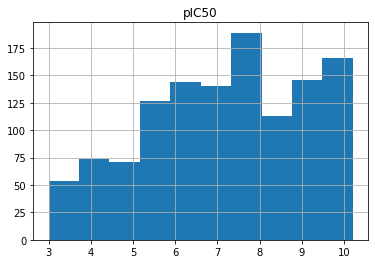

In [411]:
import matplotlib.pyplot as plt
#Draw compound data
plt = output_df.hist(column="pIC50")


In [415]:
# Add molecule column
PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol="smiles")
# Sort molecules by pIC50
output_df.sort_values(by="pIC50", ascending=False, inplace=True)

# Reset index
output_df.reset_index(drop=True, inplace=True)
output_df.drop("smiles", axis=1).head(3)
# Prepare saving the dataset: Drop the ROMol column
output_df = output_df.drop("ROMol", axis=1)
print(f"DataFrame shape: {output_df.shape}")

DataFrame shape: (1224, 5)


In [416]:
print(f"DataFrame shape: {output_df.shape}")
# NBVAL_CHECK_OUTPUT

DataFrame shape: (1224, 5)


In [417]:
output_df.to_csv(DATA / "TP53_compounds.csv")
output_df.head()
print(f"DataFrame shape: {output_df.shape}")
# NBVAL_CHECK_OUTPUT

DataFrame shape: (1224, 5)


In [418]:
from pathlib import Path
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools


In [419]:
#Mod2
#Investigate compliance with Ro5
def calculate_ro5_properties(smiles):
    """
    Test if input molecule (SMILES) fulfills Lipinski's rule of five.

    Parameters
    ----------
    smiles : str
        SMILES for a molecule.

    Returns
    -------
    pandas.Series
        Molecular weight, number of hydrogen bond acceptors/donor and logP value
        and Lipinski's rule of five compliance for input molecule.
    """
    # RDKit molecule from SMILES
    molecule = Chem.MolFromSmiles(smiles)
    # Calculate Ro5-relevant chemical properties
    molecular_weight = Descriptors.ExactMolWt(molecule)
    n_hba = Descriptors.NumHAcceptors(molecule)
    n_hbd = Descriptors.NumHDonors(molecule)
    logp = Descriptors.MolLogP(molecule)
    # Check if Ro5 conditions fulfilled
    conditions = [molecular_weight <= 500, n_hba <= 10, n_hbd <= 5, logp <= 5]
    ro5_fulfilled = sum(conditions) >= 3
    # Return True if no more than one out of four conditions is violated
    return pd.Series(
        [molecular_weight, n_hba, n_hbd, logp, ro5_fulfilled],
        index=["molecular_weight", "n_hba", "n_hbd", "logp", "ro5_fulfilled"],
    )

In [420]:
import os
os.getcwd()

'/Users/amankaushik/CDRI_Workshop/Aman_Analysis'

In [421]:
#START


#Apply Ro5 to the EGFR dataset
molecules = pd.read_csv(HERE / "/Users/amankaushik/CDRI_Workshop/Aman_Analysis/data/TP53_compounds.csv", index_col=0)
print(molecules.shape)
molecules.head()

(1224, 5)


AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

  molecule_chembl_id   IC50 units  \
0      CHEMBL3892862  0.061    nM   
1      CHEMBL3901716  0.065    nM   
2      CHEMBL3945756  0.068    nM   
3      CHEMBL3911501  0.069    nM   
4      CHEMBL3920430  0.071    nM   

                                              smiles      pIC50  
0  COc1ccc(CC(=O)O)cc1-c1cc2c(n1C(C)C)[C@H](c1ccc...  10.214670  
1  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(Cl)cc2)N(c...  10.187087  
2  COc1ncc(-c2cc3c(n2C(C)C)C(c2ccc(Cl)cc2)N(c2cc(...  10.167491  
3  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)[C@H](c1ccc(C...  10.161151  
4  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)[C@H](c1ccc(C...  10.148742  

In [422]:
# This takes a couple of seconds
ro5_properties = molecules["smiles"].apply(calculate_ro5_properties)
ro5_properties.head()

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

   molecular_weight  n_hba  n_hbd     logp  ro5_fulfilled
0        562.142613      4      1  7.73672          False
1        536.138196      6      0  6.90822          False
2        536.138196      6      0  6.90822          False
3        557.194215      9      0  4.57418           True
4        570.134922      7      1  5.48460          False

In [423]:
#Concatenate molecules with Ro5 data
molecules = pd.concat([molecules, ro5_properties], axis=1)
molecules.head()
# Save data
molecules.to_csv(DATA / "TP53_Ro5_Results.csv")
molecules.head()

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

  molecule_chembl_id   IC50 units  \
0      CHEMBL3892862  0.061    nM   
1      CHEMBL3901716  0.065    nM   
2      CHEMBL3945756  0.068    nM   
3      CHEMBL3911501  0.069    nM   
4      CHEMBL3920430  0.071    nM   

                                              smiles      pIC50  \
0  COc1ccc(CC(=O)O)cc1-c1cc2c(n1C(C)C)[C@H](c1ccc...  10.214670   
1  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(Cl)cc2)N(c...  10.187087   
2  COc1ncc(-c2cc3c(n2C(C)C)C(c2ccc(Cl)cc2)N(c2cc(...  10.167491   
3  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)[C@H](c1ccc(C...  10.161151   
4  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)[C@H](c1ccc(C...  10.148742   

   molecular_weight  n_hba  n_hbd     logp  ro5_fulfilled  
0        562.142613      4      1  7.73672          False  
1        536.138196      6      0  6.90822          False  
2        536.138196      6      0  6.90822          False  
3        557.194215      9      0  4.57418           True  
4        570.134922      7      1  5.48460          False  

In [424]:
# Note that the column "ro5_fulfilled" contains boolean values.
# Thus, we can use the column values directly to subset data.
# Note that ~ negates boolean values.
molecules_ro5_fulfilled = molecules[molecules["ro5_fulfilled"]]
molecules_ro5_violated = molecules[~molecules["ro5_fulfilled"]]

print(f"# compounds in unfiltered data set: {molecules.shape[0]}")
print(f"# compounds in filtered data set: {molecules_ro5_fulfilled.shape[0]}")
print(f"# compounds not compliant with the Ro5: {molecules_ro5_violated.shape[0]}")
# NBVAL_CHECK_OUTPUT

# compounds in unfiltered data set: 1224
# compounds in filtered data set: 440
# compounds not compliant with the Ro5: 784


In [425]:
# Save filtered data
molecules_ro5_fulfilled.to_csv(DATA / "TP53_compounds_lipinski.csv")
molecules_ro5_fulfilled.head()

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

   molecule_chembl_id   IC50 units  \
3       CHEMBL3911501  0.069    nM   
17      CHEMBL3318767  0.100    nM   
37      CHEMBL3894082  0.107    nM   
38      CHEMBL3914063  0.108    nM   
47      CHEMBL3922357  0.131    nM   

                                               smiles      pIC50  \
3   COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)[C@H](c1ccc(C...  10.161151   
17  C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2cc...  10.000000   
37  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)c(F)c2...   9.970616   
38  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)cc2)N(...   9.966576   
47  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)C(c1ccc(C#N)c...   9.882729   

    molecular_weight  n_hba  n_hbd     logp  ro5_fulfilled  
3         557.194215      9      0  4.57418           True  
17        608.151463      5      1  4.97220           True  
37        562.153159      9      0  4.65588           True  
38        544.162581      9      0  4.51678           True  
47        543.178565      8      1  4.56378           Tru

In [426]:
#Visualize Ro5 properties (radar plot)
def calculate_mean_std(dataframe):
    """
    Calculate the mean and standard deviation of a dataset.

    Parameters
    ----------
    dataframe : pd.DataFrame
        Properties (columns) for a set of items (rows).

    Returns
    -------
    pd.DataFrame
        Mean and standard deviation (columns) for different properties (rows).
    """
    # Generate descriptive statistics for property columns
    stats = dataframe.describe()
    # Transpose DataFrame (statistical measures = columns)
    stats = stats.T
    # Select mean and standard deviation
    stats = stats[["mean", "std"]]
    return stats

In [427]:
#We calculate the statistic for the dataset of compounds that are fulfilling the Ro5.

molecules_ro5_fulfilled_stats = calculate_mean_std(
    molecules_ro5_fulfilled[["molecular_weight", "n_hba", "n_hbd", "logp"]]
)
molecules_ro5_fulfilled_stats
# NBVAL_CHECK_OUTPUT
# Save data
molecules_ro5_fulfilled_stats.to_csv(DATA / "TP53_molecules_ro5_fulfilled_stats.csv")
molecules_ro5_fulfilled_stats.head()

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

                        mean        std
molecular_weight  480.732796  65.691690
n_hba               4.500000   2.109745
n_hbd               1.086364   0.883561
logp                5.128992   0.899113

In [428]:
#We calculate the statistic for the dataset of compounds that are violating the Ro5.

molecules_ro5_violated_stats = calculate_mean_std(
    molecules_ro5_violated[["molecular_weight", "n_hba", "n_hbd", "logp"]]
)
molecules_ro5_violated_stats
# Save data
molecules_ro5_violated_stats.to_csv(DATA / "TP53_molecules_ro5_violated_stats.csv")
molecules_ro5_violated_stats.head()

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

                        mean         std
molecular_weight  596.723950  139.053487
n_hba               5.271684    2.440906
n_hbd               1.246173    2.328536
logp                6.228236    1.168251

In [429]:
#Define helper functions to prepare data for radar plotting
def _scale_by_thresholds(stats, thresholds, scaled_threshold):
    """
    Scale values for different properties that have each an individually defined threshold.

    Parameters
    ----------
    stats : pd.DataFrame
        Dataframe with "mean" and "std" (columns) for each physicochemical property (rows).
    thresholds : dict of str: int
        Thresholds defined for each property.
    scaled_threshold : int or float
        Scaled thresholds across all properties.

    Returns
    -------
    pd.DataFrame
        DataFrame with scaled means and standard deviations for each physiochemical property.
    """
    # Raise error if scaling keys and data_stats indicies are not matching
    for property_name in stats.index:
        if property_name not in thresholds.keys():
            raise KeyError(f"Add property '{property_name}' to scaling variable.")
    # Scale property data
    stats_scaled = stats.apply(lambda x: x / thresholds[x.name] * scaled_threshold, axis=1)
    return stats_scaled

In [430]:
#Prepare x values: The following helper function returns the angles of the physicochemical property axes for the radar chart. For example, if we want to generate a radar plot for 4 properties, we want to set the axes at 0°, 90°, 180°, and 270°. The helper function returns such angles as radians.

def _define_radial_axes_angles(n_axes):
    """Define angles (radians) for radial (x-)axes depending on the number of axes."""
    x_angles = [i / float(n_axes) * 2 * math.pi for i in range(n_axes)]
    x_angles += x_angles[:1]
    return x_angles

In [435]:
#Generate radar plots
def plot_radar(
    y,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max=None,
    output_path=None,
):
    """
    Plot a radar chart based on the mean and standard deviation of a data set's properties.

    Parameters
    ----------
    y : pd.DataFrame
        Dataframe with "mean" and "std" (columns) for each physicochemical property (rows).
    thresholds : dict of str: int
        Thresholds defined for each property.
    scaled_threshold : int or float
        Scaled thresholds across all properties.
    properties_labels : list of str
        List of property names to be used as labels in the plot.
    y_max : None or int or float
        Set maximum y value. If None, let matplotlib decide.
    output_path : None or pathlib.Path
        If not None, save plot to file.
    """

    # Define radial x-axes angles -- uses our helper function!
    x = _define_radial_axes_angles(len(y))
    # Scale y-axis values with respect to a defined threshold -- uses our helper function!
    y = _scale_by_thresholds(y, thresholds, scaled_threshold)
    # Since our chart will be circular we append the first value of each property to the end
    y = y.append(y.iloc[0])

    # Set figure and subplot axis
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)

    # Plot data
    ax.fill(x, [scaled_threshold] * 5, "cornflowerblue", alpha=0.2)
    ax.plot(x, y["mean"], "b", lw=3, ls="-")
    ax.plot(x, y["mean"] + y["std"], "orange", lw=2, ls="--")
    ax.plot(x, y["mean"] - y["std"], "orange", lw=2, ls="-.")

    # From here on, we only do plot cosmetics
    # Set 0° to 12 o'clock
    ax.set_theta_offset(math.pi / 2)
    # Set clockwise rotation
    ax.set_theta_direction(-1)

    # Set y-labels next to 180° radius axis
    ax.set_rlabel_position(180)
    # Set number of radial axes' ticks and remove labels
    plt.xticks(x, [])
    # Get maximal y-ticks value
    if not y_max:
        y_max = int(ax.get_yticks()[-1])
    # Set axes limits
    plt.ylim(0, y_max)
    # Set number and labels of y axis ticks
    plt.yticks(
        range(1, y_max),
        ["5" if i == scaled_threshold else "" for i in range(1, y_max)],
        fontsize=16,
    )

    # Draw ytick labels to make sure they fit properly
    # Note that we use [:1] to exclude the last element which equals the first element (not needed here)
    for i, (angle, label) in enumerate(zip(x[:-1], properties_labels)):
        if angle == 0:
            ha = "center"
        elif 0 < angle < math.pi:
            ha = "left"
        elif angle == math.pi:
            ha = "center"
        else:
            ha = "right"
        ax.text(
            x=angle,
            y=y_max + 1,
            s=label,
            size=16,
            horizontalalignment=ha,
            verticalalignment="center",
        )

    # Add legend relative to top-left plot
    labels = ("mean", "mean + std", "mean - std", "rule of five area")
    ax.legend(labels, loc=(1.1, 0.7), labelspacing=0.3, fontsize=16)

    # Save plot - use bbox_inches to include text boxes
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=True)

    plt.show()

In [436]:
#Define input parameters that should stay the same for both radar charts
thresholds = {"molecular_weight": 500, "n_hba": 10, "n_hbd": 5, "logp": 5}
scaled_threshold = 5
properties_labels = [
    "Molecular weight (Da) / 100",
    "# HBA / 2",
    "# HBD",
    "LogP",
]
y_max = 8

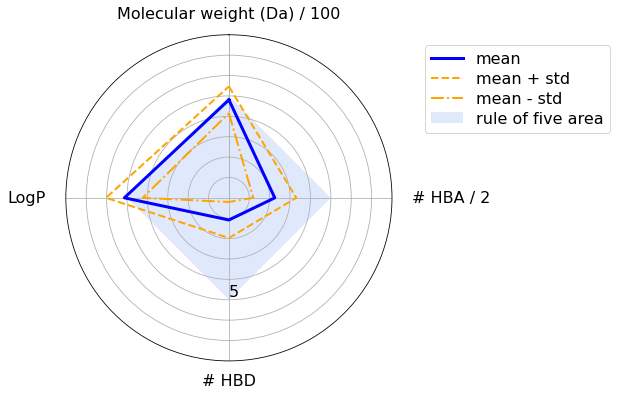

AttributeError: 'NoneType' object has no attribute 'savefig'

In [457]:
#We plot the radarplot for the dataset of compounds that fulfill the Ro5
plt = plot_radar(
    molecules_ro5_fulfilled_stats,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max,
)
plt.savefig('/Users/amankaushik/CDRI_Workshop/Aman_Analysis/data/radarplot_fulfill_Ro5.pdf') 

In [442]:
#We plot the radarplot for the dataset of compounds that violate the Ro5
fig = plot_radar(
    molecules_ro5_violated_stats,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max,
)
# Save altered SVG data to file
    #plt.savefig(DATA / "radarplot_for_compounds_that_violate_Ro5.pdf")

AttributeError: 'NoneType' object has no attribute 'figure'

In [443]:
#Mod3
#Molecular filtering: unwanted substructures
from pathlib import Path

import pandas as pd
from tqdm.auto import tqdm
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.FilterCatalog import FilterCatalog, FilterCatalogParams
#<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.


In [444]:
# load data from Talkt T2
egfr_data = pd.read_csv(
    HERE / "/Users/amankaushik/CDRI_Workshop/Aman_Analysis/data/TP53_compounds_lipinski.csv",
    index_col=0,
)
# Drop unnecessary information
print("Dataframe shape:", egfr_data.shape)
egfr_data.drop(columns=["molecular_weight", "n_hbd", "n_hba", "logp"], inplace=True)
egfr_data.head()

Dataframe shape: (440, 10)


AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

   molecule_chembl_id   IC50 units  \
3       CHEMBL3911501  0.069    nM   
17      CHEMBL3318767  0.100    nM   
37      CHEMBL3894082  0.107    nM   
38      CHEMBL3914063  0.108    nM   
47      CHEMBL3922357  0.131    nM   

                                               smiles      pIC50  \
3   COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)[C@H](c1ccc(C...  10.161151   
17  C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2cc...  10.000000   
37  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)c(F)c2...   9.970616   
38  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)cc2)N(...   9.966576   
47  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)C(c1ccc(C#N)c...   9.882729   

    ro5_fulfilled  
3            True  
17           True  
37           True  
38           True  
47           True  

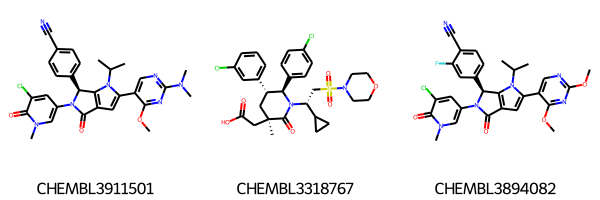

In [445]:
# Add molecule column
PandasTools.AddMoleculeColumnToFrame(egfr_data, smilesCol="smiles")
# Draw first 3 molecules
Chem.Draw.MolsToGridImage(
    list(egfr_data.head(3).ROMol),
    legends=list(egfr_data.head(3).molecule_chembl_id),
)

In [446]:
#Filter for PAINS (Pan Assay Interference Compounds)
# initialize filter
params = FilterCatalogParams()
params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS)
catalog = FilterCatalog(params)
# search for PAINS
matches = []
clean = []
for index, row in tqdm(egfr_data.iterrows(), total=egfr_data.shape[0]):
    molecule = Chem.MolFromSmiles(row.smiles)
    entry = catalog.GetFirstMatch(molecule)  # Get the first matching PAINS
    if entry is not None:
        # store PAINS information
        matches.append(
            {
                "chembl_id": row.molecule_chembl_id,
                "rdkit_molecule": molecule,
                "pains": entry.GetDescription().capitalize(),
            }
        )
    else:
        # collect indices of molecules without PAINS
        clean.append(index)

matches = pd.DataFrame(matches)
egfr_data = egfr_data.loc[clean]  # keep molecules without PAINS


  0%|          | 0/440 [00:00<?, ?it/s]

In [447]:
# NBVAL_CHECK_OUTPUT
print(f"Number of compounds with PAINS: {len(matches)}")
print(f"Number of compounds without PAINS: {len(egfr_data)}")

Number of compounds with PAINS: 7
Number of compounds without PAINS: 433


In [448]:
# NBVAL_CHECK_OUTPUT
print(f"Number of found unwanted substructure: {len(matches)}")
print(f"Number of compounds without unwanted substructure: {len(egfr_data)}")

Number of found unwanted substructure: 7
Number of compounds without unwanted substructure: 433


In [449]:
#Mod4
#Ligand-based screening: compound similarity
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import (
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys,
    rdFingerprintGenerator,
)

In [450]:
#Virtual screening using similarity search
molecule_dataset = pd.read_csv(
    HERE / "/Users/amankaushik/CDRI_Workshop/Aman_Analysis/data/TP53_compounds_lipinski.csv",
    usecols=["molecule_chembl_id", "smiles", "pIC50"],
)
print(f"Number of molecules in dataset: {len(molecule_dataset)}")
molecule_dataset.head(5)

Number of molecules in dataset: 440


AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

  molecule_chembl_id                                             smiles  \
0      CHEMBL3911501  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)[C@H](c1ccc(C...   
1      CHEMBL3318767  C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2cc...   
2      CHEMBL3894082  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)c(F)c2...   
3      CHEMBL3914063  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)cc2)N(...   
4      CHEMBL3922357  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)C(c1ccc(C#N)c...   

       pIC50  
0  10.161151  
1  10.000000  
2   9.970616  
3   9.966576  
4   9.882729  

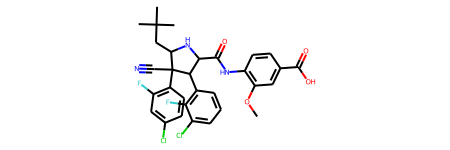

In [451]:
#For the query molecule
query = Chem.MolFromSmiles("CC(C)(C)CC1C(C(C(N1)C(=O)NC2=C(C=C(C=C2)C(=O)O)OC)C3=C(C(=CC=C3)Cl)F)(C#N)C4=C(C=C(C=C4)Cl)F")
query


In [452]:
#Generate MACCS and Morgan fingerprints for the query molecule
maccs_fp_query = MACCSkeys.GenMACCSKeys(query)
circular_fp_query = rdFingerprintGenerator.GetCountFPs([query])[0]

In [453]:
#Generate MACCS and Morgan fingerprints for all molecules in our dataset
PandasTools.AddMoleculeColumnToFrame(molecule_dataset, "smiles")
circular_fp_list = rdFingerprintGenerator.GetCountFPs(molecule_dataset["ROMol"].tolist())
maccs_fp_list = molecule_dataset["ROMol"].apply(MACCSkeys.GenMACCSKeys).tolist()


#Calculate the Tanimoto similarity between the query molecule (Gefitinib) and all molecules our dataset (using MACCS and Morgan fingerprints).

molecule_dataset["tanimoto_maccs"] = DataStructs.BulkTanimotoSimilarity(
    maccs_fp_query, maccs_fp_list
)
molecule_dataset["tanimoto_morgan"] = DataStructs.BulkTanimotoSimilarity(
    circular_fp_query, circular_fp_list
)


#Calculate Dice similarity for query molecule (Gefitinib) and all molecules in file (MACCS, Morgan).

molecule_dataset["dice_maccs"] = DataStructs.BulkDiceSimilarity(maccs_fp_query, maccs_fp_list)
molecule_dataset["dice_morgan"] = DataStructs.BulkDiceSimilarity(
    circular_fp_query, circular_fp_list
)
# NBVAL_CHECK_OUTPUT
molecule_dataset[
    ["smiles", "tanimoto_maccs", "tanimoto_morgan", "dice_maccs", "dice_morgan"]
].head(5)
# Save data
molecule_dataset.to_csv(DATA / "TP53_molecule_dataset.csv")
molecule_dataset.head()

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

  molecule_chembl_id                                             smiles  \
0      CHEMBL3911501  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)[C@H](c1ccc(C...   
1      CHEMBL3318767  C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2cc...   
2      CHEMBL3894082  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)c(F)c2...   
3      CHEMBL3914063  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)cc2)N(...   
4      CHEMBL3922357  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)C(c1ccc(C#N)c...   

       pIC50                                              ROMol  \
0  10.161151  <img data-content="rdkit/molecule" src="data:i...   
1  10.000000  <img data-content="rdkit/molecule" src="data:i...   
2   9.970616  <img data-content="rdkit/molecule" src="data:i...   
3   9.966576  <img data-content="rdkit/molecule" src="data:i...   
4   9.882729  <img data-content="rdkit/molecule" src="data:i...   

   tanimoto_maccs  tanimoto_morgan  dice_maccs  dice_morgan  
0        0.597222         0.224044    0.747826     0.366071  
1        0.421053     

In [454]:
# Show all columns
molecule_dataset.head(3)

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

  molecule_chembl_id                                             smiles  \
0      CHEMBL3911501  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)[C@H](c1ccc(C...   
1      CHEMBL3318767  C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2cc...   
2      CHEMBL3894082  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)c(F)c2...   

       pIC50                                              ROMol  \
0  10.161151  <img data-content="rdkit/molecule" src="data:i...   
1  10.000000  <img data-content="rdkit/molecule" src="data:i...   
2   9.970616  <img data-content="rdkit/molecule" src="data:i...   

   tanimoto_maccs  tanimoto_morgan  dice_maccs  dice_morgan  
0        0.597222         0.224044    0.747826     0.366071  
1        0.421053         0.243094    0.592593     0.391111  
2        0.625000         0.217391    0.769231     0.357143  

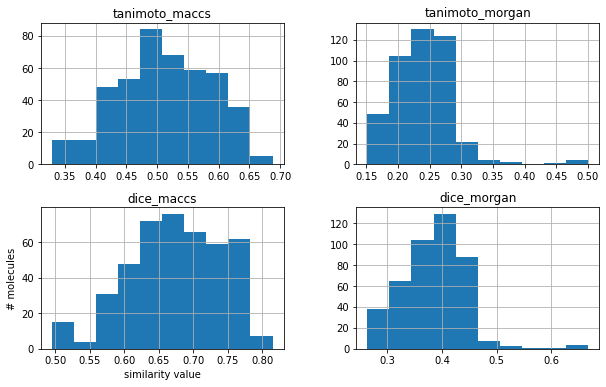

In [456]:
#Distribution of similarity values
fig, axes = plt.subplots(figsize=(10, 6), nrows=2, ncols=2)
molecule_dataset.hist(["tanimoto_maccs"], ax=axes[0, 0])
molecule_dataset.hist(["tanimoto_morgan"], ax=axes[0, 1])
molecule_dataset.hist(["dice_maccs"], ax=axes[1, 0])
molecule_dataset.hist(["dice_morgan"], ax=axes[1, 1])
axes[1, 0].set_xlabel("similarity value")
axes[1, 0].set_ylabel("# molecules")
fig;
fig.savefig('/Users/amankaushik/CDRI_Workshop/Aman_Analysis/data/Distribution_of_similarity_values.pdf')

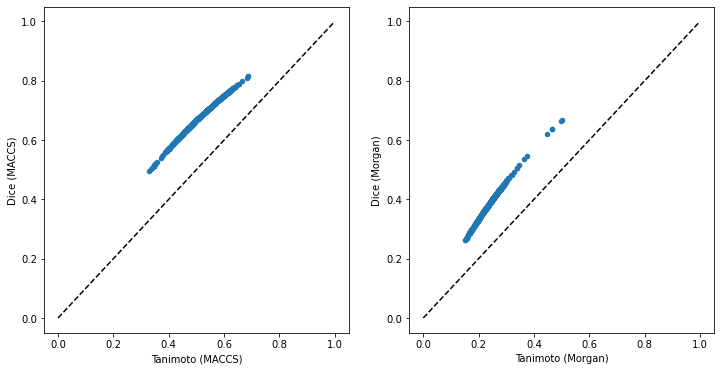

In [480]:
import matplotlib.pyplot as plt
#Second, we can compare similarities here. This time, let's directly compare Tanimoto and Dice similarities for the two fingerprints
fig, axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)

molecule_dataset.plot("tanimoto_maccs", "dice_maccs", kind="scatter", ax=axes[0])
axes[0].plot([0, 1], [0, 1], "k--")
axes[0].set_xlabel("Tanimoto (MACCS)")
axes[0].set_ylabel("Dice (MACCS)")

molecule_dataset.plot("tanimoto_morgan", "dice_morgan", kind="scatter", ax=axes[1])
axes[1].plot([0, 1], [0, 1], "k--")
axes[1].set_xlabel("Tanimoto (Morgan)")
axes[1].set_ylabel("Dice (Morgan)")

fig;


In [466]:
# Save altered SVG data to file
   fig.savefig('/Users/amankaushik/CDRI_Workshop/Aman_Analysis/data/compare_Tanimoto_and_Dice_similarities.pdf') 

IndentationError: unexpected indent (3607146331.py, line 2)

In [481]:
#Visualize most similar molecules
molecule_dataset.sort_values(["tanimoto_morgan"], ascending=False).head(3)
# Save data
molecule_dataset.to_csv(DATA / "TP53_most_similar_molecules.csv")
molecule_dataset.head()

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

    molecule_chembl_id                                             smiles  \
108      CHEMBL3353231  CC(C)(C)C[C@@H]1N[C@@H](C(=O)NCC=N)[C@H](c2ccc...   
163      CHEMBL3220692  CC(C)(C)C[C@@H]1N[C@@H](C(=O)NCC[C@H](O)CO)[C@...   
203      CHEMBL4203529  CC(C)(C)CC1C=C(C(=O)O)C(c2cccc(Cl)c2F)C12C(=O)...   
92       CHEMBL4218748  CC(C)(C)C[C@@H]1C=C(C(=O)O)[C@H](c2cccc(Cl)c2F...   
107       CHEMBL379173  CC(C)(C)C[C@H]1N[C@@H](C(=O)NCCN2CCOCC2)[C@H](...   

        pIC50                                              ROMol  \
108  7.602060  <img data-content="rdkit/molecule" src="data:i...   
163  6.782516  <img data-content="rdkit/molecule" src="data:i...   
203  6.269056  <img data-content="rdkit/molecule" src="data:i...   
92   7.995679  <img data-content="rdkit/molecule" src="data:i...   
107  7.677781  <img data-content="rdkit/molecule" src="data:i...   

     tanimoto_maccs  tanimoto_morgan  dice_maccs  dice_morgan  
108        0.681159         0.500000    0.810345     0.666667  


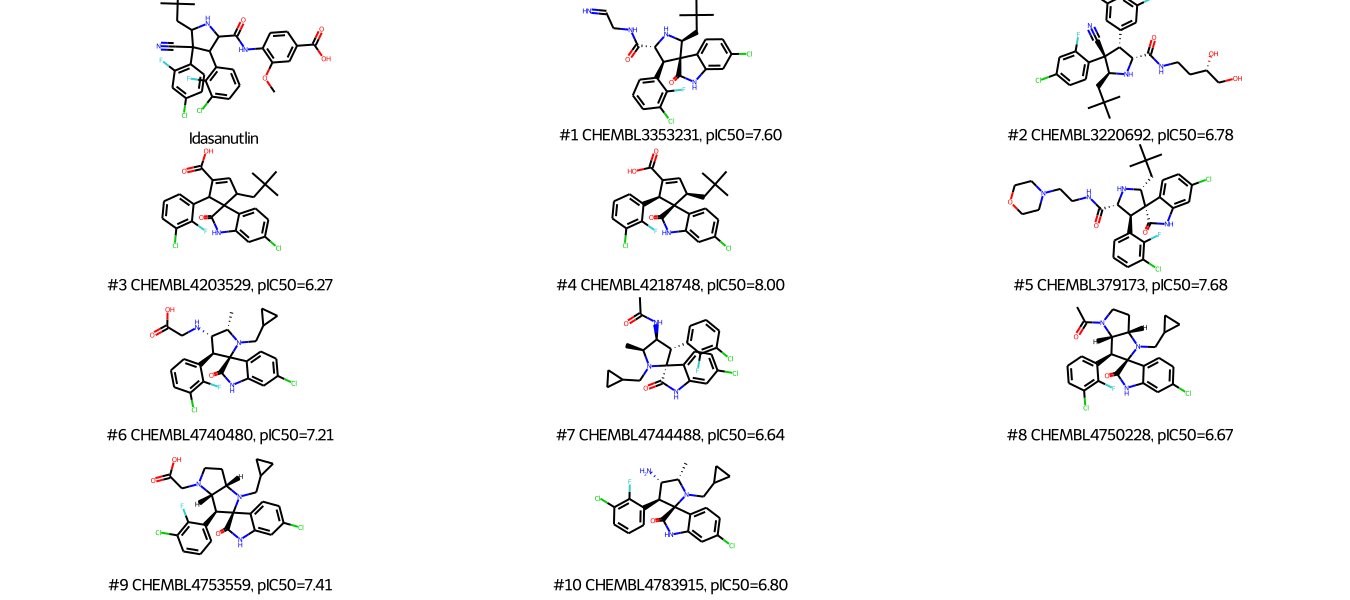

In [488]:
#Show the query and its most similar molecules alongside the molecules' bioactivities
top_n_molecules = 10
top_molecules = molecule_dataset.sort_values(["tanimoto_morgan"], ascending=False).reset_index()
top_molecules = top_molecules[:top_n_molecules]
legends = [
    f"#{index+1} {molecule['molecule_chembl_id']}, pIC50={molecule['pIC50']:.2f}"
    for index, molecule in top_molecules.iterrows()
]
Chem.Draw.MolsToGridImage(
    mols=[query] + top_molecules["ROMol"].tolist(),
    legends=(["Idasanutlin"] + legends),
    molsPerRow=3,
    subImgSize=(450, 150),
)


In [489]:
#Generate enrichment plots
molecule_dataset.head(3)
def get_enrichment_data(molecules, similarity_measure, pic50_cutoff):
    """
    Calculates x and y values for enrichment plot:
        x - % ranked dataset
        y - % true actives identified

    Parameters
    ----------
    molecules : pandas.DataFrame
        Molecules with similarity values to a query molecule.
    similarity_measure : str
        Column name which will be used to sort the DataFrame．
    pic50_cutoff : float
        pIC50 cutoff value used to discriminate active and inactive molecules.

    Returns
    -------
    pandas.DataFrame
        Enrichment data: Percentage of ranked dataset by similarity vs. percentage of identified true actives.
    """

    # Get number of molecules in data set
    molecules_all = len(molecules)

    # Get number of active molecules in data set
    actives_all = sum(molecules["pIC50"] >= pic50_cutoff)

    # Initialize a list that will hold the counter for actives and molecules while iterating through our dataset
    actives_counter_list = []

    # Initialize counter for actives
    actives_counter = 0

    # Note: Data must be ranked for enrichment plots:
    # Sort molecules by selected similarity measure
    molecules.sort_values([similarity_measure], ascending=False, inplace=True)

    # Iterate over the ranked dataset and check each molecule if active (by checking bioactivity)
    for value in molecules["pIC50"]:
        if value >= pic50_cutoff:
            actives_counter += 1
        actives_counter_list.append(actives_counter)

    # Transform number of molecules into % ranked dataset
    molecules_percentage_list = [i / molecules_all for i in range(1, molecules_all + 1)]

    # Transform number of actives into % true actives identified
    actives_percentage_list = [i / actives_all for i in actives_counter_list]

    # Generate DataFrame with x and y values as well as label
    enrichment = pd.DataFrame(
        {
            "% ranked dataset": molecules_percentage_list,
            "% true actives identified": actives_percentage_list,
        }
    )

    return enrichment

In [490]:
#Set the pIC50 cutoff used to discriminate active and inactive molecules...
pic50_cutoff = 6.3

In [491]:
#...and get the enrichment for MACCS and Morgan fingerprints (using the Tanimoto similarity)
similarity_measures = ["tanimoto_maccs", "tanimoto_morgan"]
enrichment_data = {
    similarity_measure: get_enrichment_data(molecule_dataset, similarity_measure, pic50_cutoff)
    for similarity_measure in similarity_measures
}

In [492]:
#Show enrichment data
# NBVAL_CHECK_OUTPUT
enrichment_data["tanimoto_maccs"].head()


AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

   % ranked dataset  % true actives identified
0          0.002273                   0.000000
1          0.004545                   0.004926
2          0.006818                   0.009852
3          0.009091                   0.014778
4          0.011364                   0.019704

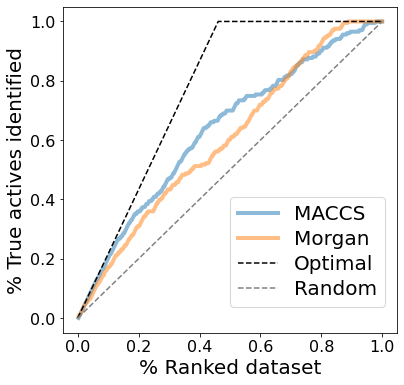

In [493]:
#Plot the enrichment data next to the optimal and random enrichment curve!
fig, ax = plt.subplots(figsize=(6, 6))

fontsize = 20

# Plot enrichment data
for similarity_measure, enrichment in enrichment_data.items():
    ax = enrichment.plot(
        ax=ax,
        x="% ranked dataset",
        y="% true actives identified",
        label=similarity_measure,
        alpha=0.5,
        linewidth=4,
    )
ax.set_ylabel("% True actives identified", size=fontsize)
ax.set_xlabel("% Ranked dataset", size=fontsize)

# Plot optimal curve: Ratio of actives in dataset
ratio_actives = sum(molecule_dataset["pIC50"] >= pic50_cutoff) / len(molecule_dataset)
ax.plot(
    [0, ratio_actives, 1],
    [0, 1, 1],
    label="Optimal curve",
    color="black",
    linestyle="--",
)

# Plot random curve
ax.plot([0, 1], [0, 1], label="Random curve", color="grey", linestyle="--")

plt.tick_params(labelsize=16)
plt.legend(
    labels=["MACCS", "Morgan", "Optimal", "Random"],
    loc=(0.5, 0.08),
    fontsize=fontsize,
    labelspacing=0.3,
)

# Save plot -- use bbox_inches to include text boxes
plt.savefig(
    DATA / "enrichment_plot.png",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)

plt.show()

In [494]:
#Calculate enrichment factors
def calculate_enrichment_factor(enrichment, ranked_dataset_percentage_cutoff):
    """
    Get the experimental enrichment factor for a given percentage of the ranked dataset.

    Parameters
    ----------
    enrichment : pd.DataFrame
        Enrichment data: Percentage of ranked dataset by similarity vs. percentage of
        identified true actives.
    ranked_dataset_percentage_cutoff : float or int
        Percentage of ranked dataset to be included in enrichment factor calculation.

    Returns
    -------
    float
        Experimental enrichment factor.
    """

    # Keep only molecules that meet the cutoff
    enrichment = enrichment[
        enrichment["% ranked dataset"] <= ranked_dataset_percentage_cutoff / 100
    ]
    # Get highest percentage of actives and the corresponding percentage of actives
    highest_enrichment = enrichment.iloc[-1]
    enrichment_factor = round(100 * float(highest_enrichment["% true actives identified"]), 1)
    return enrichment_factor

In [495]:
#This helper function calculates the random enrichment of active molecules in the top x% of ranked molecules (random enrichment factor)
def calculate_enrichment_factor_random(ranked_dataset_percentage_cutoff):
    """
    Get the random enrichment factor for a given percentage of the ranked dataset.

    Parameters
    ----------
    ranked_dataset_percentage_cutoff : float or int
        Percentage of ranked dataset to be included in enrichment factor calculation.

    Returns
    -------
    float
        Random enrichment factor.
    """

    enrichment_factor_random = round(float(ranked_dataset_percentage_cutoff), 1)
    return enrichment_factor_random

In [496]:
def calculate_enrichment_factor_optimal(molecules, ranked_dataset_percentage_cutoff, pic50_cutoff):
    """
    Get the optimal random enrichment factor for a given percentage of the ranked dataset.

    Parameters
    ----------
    molecules : pandas.DataFrame
        the DataFrame with all the molecules and pIC50.
    ranked_dataset_percentage_cutoff : float or int
        Percentage of ranked dataset to be included in enrichment factor calculation.
    activity_cutoff: float
        pIC50 cutoff value used to discriminate active and inactive molecules

    Returns
    -------
    float
        Optimal enrichment factor.
    """

    ratio = sum(molecules["pIC50"] >= pic50_cutoff) / len(molecules) * 100
    if ranked_dataset_percentage_cutoff <= ratio:
        enrichment_factor_optimal = round(100 / ratio * ranked_dataset_percentage_cutoff, 1)
    else:
        enrichment_factor_optimal = 100.0
    return enrichment_factor_optimal

In [497]:
#We are ready to calculate the experimental enrichment factor (EF) for 5% of ranked dataset...
ranked_dataset_percentage_cutoff = 5
for similarity_measure, enrichment in enrichment_data.items():
    enrichment_factor = calculate_enrichment_factor(enrichment, ranked_dataset_percentage_cutoff)
    print(
        f"Experimental EF for {ranked_dataset_percentage_cutoff}% of ranked dataset ({similarity_measure}): {enrichment_factor}%"
    )
# NBVAL_CHECK_OUTPUT

Experimental EF for 5% of ranked dataset (tanimoto_maccs): 10.3%
Experimental EF for 5% of ranked dataset (tanimoto_morgan): 8.4%


In [498]:
enrichment_factor_random = calculate_enrichment_factor_random(ranked_dataset_percentage_cutoff)
print(
    f"Random EF for {ranked_dataset_percentage_cutoff}% of ranked dataset: {enrichment_factor_random}%"
)
enrichment_factor_optimal = calculate_enrichment_factor_optimal(
    molecule_dataset, ranked_dataset_percentage_cutoff, pic50_cutoff
)
print(
    f"Optimal EF for {ranked_dataset_percentage_cutoff}% of ranked dataset: {enrichment_factor_optimal}%"
)
# NBVAL_CHECK_OUTPUT


Random EF for 5% of ranked dataset: 5.0%
Optimal EF for 5% of ranked dataset: 10.8%


In [500]:
#Mod5
import time
import random
from pathlib import Path

import pandas as pd
import numpy
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator

#from teachopencadd.utils import seed_everything

#seed_everything()  # fix seed to get deterministic outputs

In [ ]:
mamba create -n teachopencadd teachopencadd

In [20]:
pip install mamba


     |████████████████████████████████| 184 kB 3.7 MB/s eta 0:00:01
  Created wheel for mamba: filename=mamba-0.11.2-py3-none-any.whl size=15391 sha256=3c270988374d00bdcb75d1eed8a5f5d04a89c6b98ab6b7e702e74bd81c7fcf8b
  Stored in directory: /Users/amankaushik/Library/Caches/pip/wheels/c5/e3/1d/bf899e86efa8c92a7642eb3bef00c3d1c166789cac72d2dc5e
  Created wheel for clint: filename=clint-0.5.1-py3-none-any.whl size=34474 sha256=be06a3665b2bf8a8a1a14be88341f90a8e157c9b8c50897f97c1921be2b28ce7
  Stored in directory: /Users/amankaushik/Library/Caches/pip/wheels/2c/69/16/04ffdd2e6fbbf2b3aa97970ba8d01c36d09df025f19f25c57e
  Created wheel for args: filename=args-0.1.0-py3-none-any.whl size=3317 sha256=ba5084882fc8c2abf310a8181731c547420212ca58706f8769bce8c2c9e2711e
  Stored in directory: /Users/amankaushik/Library/Caches/pip/wheels/35/22/2d/ee3fc491993d35adc89bcc8f558090cabefeff184a9537928d
Successfully built mamba clint args
Note: you may need to restart the kernel to use updated packages.


In [501]:
# Load and have a look into data
# Filtered data taken from **Talktorial T002**
compound_df = pd.read_csv(
    HERE / "/Users/amankaushik/CDRI_Workshop/Aman_Analysis/data/TP53_compounds_lipinski.csv",
    index_col=0,
)
print("Dataframe shape:", compound_df.shape)
compound_df.head()

Dataframe shape: (440, 10)


AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

   molecule_chembl_id   IC50 units  \
3       CHEMBL3911501  0.069    nM   
17      CHEMBL3318767  0.100    nM   
37      CHEMBL3894082  0.107    nM   
38      CHEMBL3914063  0.108    nM   
47      CHEMBL3922357  0.131    nM   

                                               smiles      pIC50  \
3   COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)[C@H](c1ccc(C...  10.161151   
17  C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2cc...  10.000000   
37  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)c(F)c2...   9.970616   
38  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)cc2)N(...   9.966576   
47  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)C(c1ccc(C#N)c...   9.882729   

    molecular_weight  n_hba  n_hbd     logp  ro5_fulfilled  
3         557.194215      9      0  4.57418           True  
17        608.151463      5      1  4.97220           True  
37        562.153159      9      0  4.65588           True  
38        544.162581      9      0  4.51678           True  
47        543.178565      8      1  4.56378           Tru

In [502]:
# Create molecules from SMILES and store in array
compounds = []
# .itertuples() returns a (index, column1, column2, ...) tuple per row
# we don't need index so we use _ instead
# note how we are slicing the dataframe to only the two columns we need now
for _, chembl_id, smiles in compound_df[["molecule_chembl_id", "smiles"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), chembl_id))
compounds[:5]

[(<rdkit.Chem.rdchem.Mol at 0x7faed24d03a0>, 'CHEMBL3911501'),
 (<rdkit.Chem.rdchem.Mol at 0x7faef1df52e0>, 'CHEMBL3318767'),
 (<rdkit.Chem.rdchem.Mol at 0x7faedf7315e0>, 'CHEMBL3894082'),
 (<rdkit.Chem.rdchem.Mol at 0x7faeceeda400>, 'CHEMBL3914063'),
 (<rdkit.Chem.rdchem.Mol at 0x7faed24d4be0>, 'CHEMBL3922357')]

In [503]:
# Create fingerprints for all molecules
rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)
fingerprints = [rdkit_gen.GetFingerprint(mol) for mol, idx in compounds]

# How many compounds/fingerprints do we have?
print("Number of compounds converted:", len(fingerprints))
print("Fingerprint length per compound:", len(fingerprints[0]))
# NBVAL_CHECK_OUTPUT

Number of compounds converted: 440
Fingerprint length per compound: 2048


In [504]:
#Tanimoto similarity and distance matrix
def tanimoto_distance_matrix(fp_list):
    """Calculate distance matrix for fingerprint list"""
    dissimilarity_matrix = []
    # Notice how we are deliberately skipping the first and last items in the list
    # because we don't need to compare them against themselves
    for i in range(1, len(fp_list)):
        # Compare the current fingerprint against all the previous ones in the list
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i], fp_list[:i])
        # Since we need a distance matrix, calculate 1-x for every element in similarity matrix
        dissimilarity_matrix.extend([1 - x for x in similarities])
    return dissimilarity_matrix

In [505]:
# Example: Calculate single similarity of two fingerprints
# NBVAL_CHECK_OUTPUT
sim = DataStructs.TanimotoSimilarity(fingerprints[0], fingerprints[1])
print(f"Tanimoto similarity: {sim:.2f}, distance: {1-sim:.2f}")

Tanimoto similarity: 0.21, distance: 0.79


In [506]:
# Example: Calculate distance matrix (distance = 1-similarity)
tanimoto_distance_matrix(fingerprints)[0:5]

[0.7852283770651117,
 0.08733087330873313,
 0.7891221374045801,
 0.054777070063694255,
 0.7892682926829269]

In [507]:
# Side note: That looked like a list and not a matrix.
# But it is a triangular similarity matrix in the form of a list
n = len(fingerprints)

# Calculate number of elements in triangular matrix via n*(n-1)/2
elem_triangular_matr = (n * (n - 1)) / 2
print(
    f"Elements in the triangular matrix ({elem_triangular_matr:.0f}) ==",
    f"tanimoto_distance_matrix(fingerprints) ({len(tanimoto_distance_matrix(fingerprints))})",
)
# NBVAL_CHECK_OUTPUT

Elements in the triangular matrix (96580) == tanimoto_distance_matrix(fingerprints) (96580)


In [508]:
#Clustering molecules: Centroids and exclusion spheres
def cluster_fingerprints(fingerprints, cutoff=0.2):
    """Cluster fingerprints
    Parameters:
        fingerprints
        cutoff: threshold for the clustering
    """
    # Calculate Tanimoto distance matrix
    distance_matrix = tanimoto_distance_matrix(fingerprints)
    # Now cluster the data with the implemented Butina algorithm:
    clusters = Butina.ClusterData(distance_matrix, len(fingerprints), cutoff, isDistData=True)
    clusters = sorted(clusters, key=len, reverse=True)
    return clusters

In [510]:
#Cluster the molecules based on their fingerprint similarity
# Run the clustering procedure for the dataset
clusters = cluster_fingerprints(fingerprints, cutoff=0.3)

# Give a short report about the numbers of clusters and their sizes
num_clust_g1 = sum(1 for c in clusters if len(c) == 1)
num_clust_g5 = sum(1 for c in clusters if len(c) > 5)
num_clust_g25 = sum(1 for c in clusters if len(c) > 25)
num_clust_g100 = sum(1 for c in clusters if len(c) > 100)

print("total # clusters: ", len(clusters))
print("# clusters with only 1 compound: ", num_clust_g1)
print("# clusters with >5 compounds: ", num_clust_g5)
print("# clusters with >25 compounds: ", num_clust_g25)
print("# clusters with >100 compounds: ", num_clust_g100)
# NBVAL_CHECK_OUTPUT


total # clusters:  53
# clusters with only 1 compound:  24
# clusters with >5 compounds:  12
# clusters with >25 compounds:  5
# clusters with >100 compounds:  1


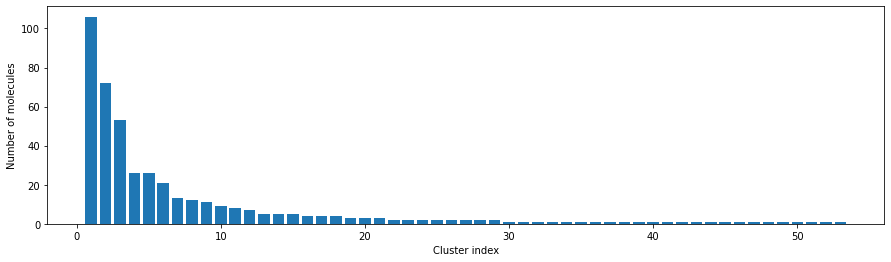

In [511]:
# Plot the size of the clusters
fig, ax = plt.subplots(figsize=(15, 4))
ax.set_xlabel("Cluster index")
ax.set_ylabel("Number of molecules")
ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters], lw=5);
fig.savefig('/Users/amankaushik/CDRI_Workshop/Aman_Analysis/data/plot_clusters.pdf')

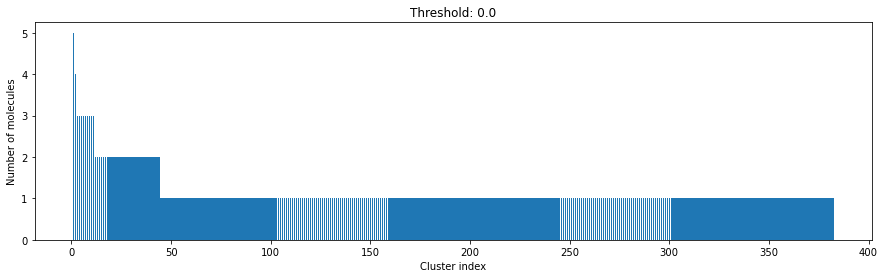

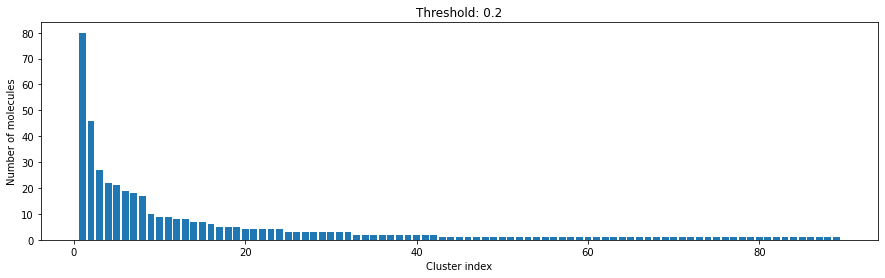

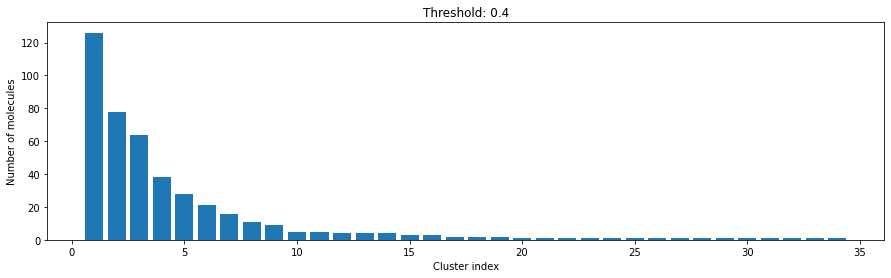

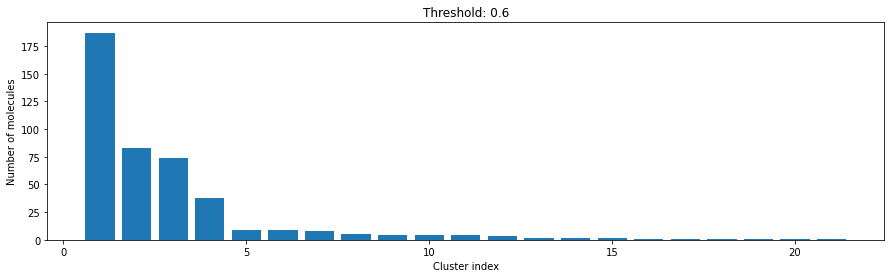

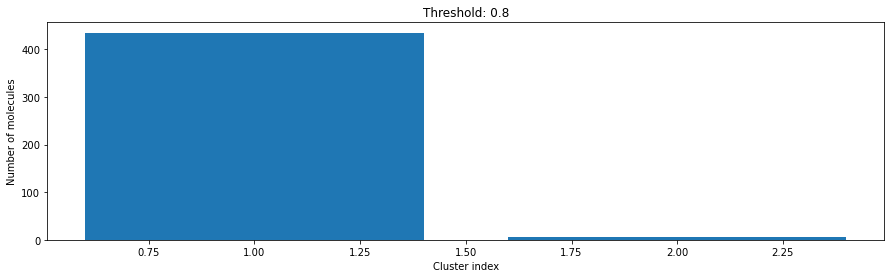

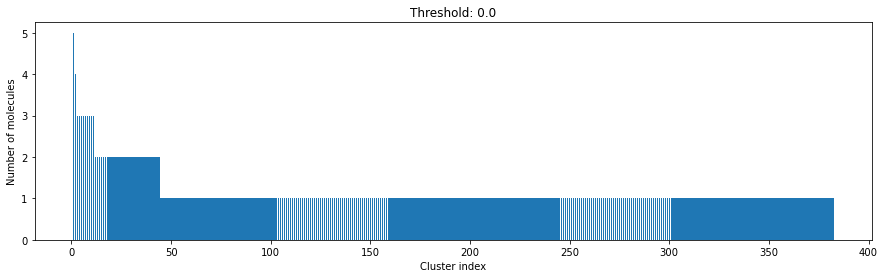

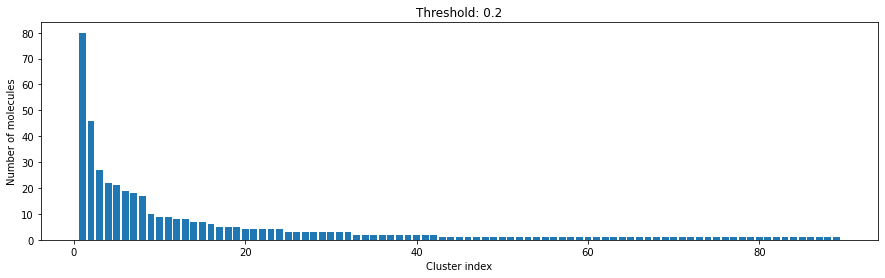

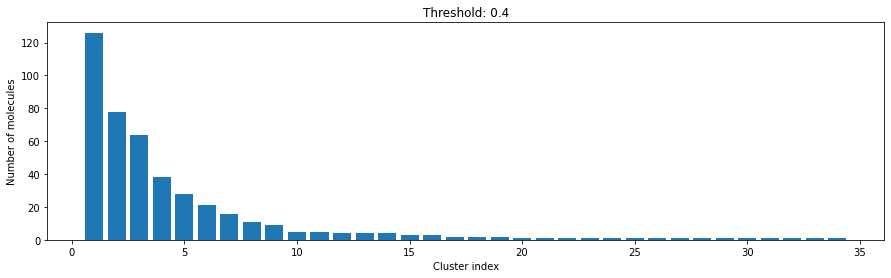

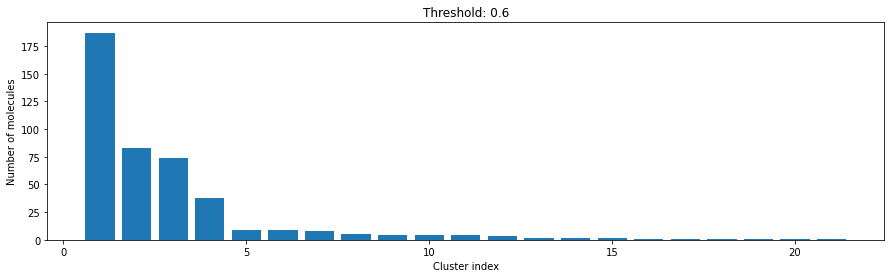

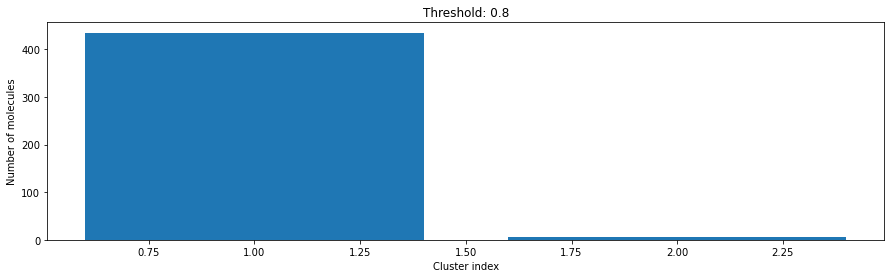

In [515]:
#How to pick a reasonable cutoff?
for cutoff in numpy.arange(0.0, 1.0, 0.2):
    clusters = cluster_fingerprints(fingerprints, cutoff=cutoff)
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.set_title(f"Threshold: {cutoff:3.1f}")
    ax.set_xlabel("Cluster index")
    ax.set_ylabel("Number of molecules")
    ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters], lw=5)
    display(fig)
    # Save altered SVG data to file
    fig.savefig('/Users/amankaushik/CDRI_Workshop/Aman_Analysis/data/plot_How_to_pick_reasonable_cutoff.pdf')

Number of clusters: 89 from 440 molecules at distance cut-off 0.20
Number of molecules in largest cluster: 80
Similarity between two random points in same cluster: 0.90
Similarity between two random points in different cluster: 0.18


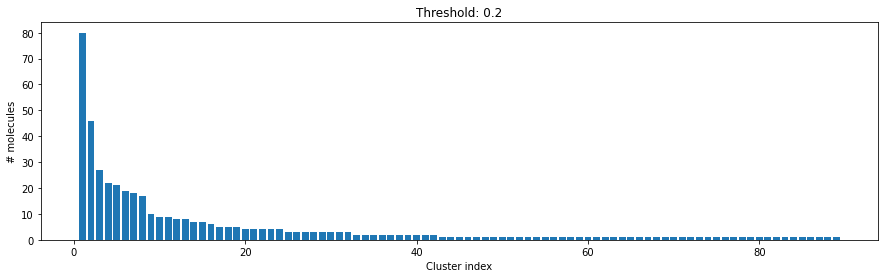

In [516]:
#Looking at the plots above, we decided to choose a distance threshold of 0.2. There are not many singletons and the cluster sizes don't have an extreme but smooth distribution
cutoff = 0.2
clusters = cluster_fingerprints(fingerprints, cutoff=cutoff)

# Plot the size of the clusters - save plot
fig, ax = plt.subplots(figsize=(15, 4))
ax.set_xlabel("Cluster index")
ax.set_ylabel("# molecules")
ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters])
ax.set_title(f"Threshold: {cutoff:3.1f}")
fig.savefig(
    DATA / f"cluster_dist_cutoff_{cutoff:4.2f}.png",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)

print(
    f"Number of clusters: {len(clusters)} from {len(compounds)} molecules at distance cut-off {cutoff:.2f}"
)
print("Number of molecules in largest cluster:", len(clusters[0]))
print(
    f"Similarity between two random points in same cluster: {DataStructs.TanimotoSimilarity(fingerprints[clusters[0][0]], fingerprints[clusters[0][1]]):.2f}"
)
print(
    f"Similarity between two random points in different cluster: {DataStructs.TanimotoSimilarity(fingerprints[clusters[0][0]], fingerprints[clusters[1][0]]):.2f}"
)

Ten molecules from largest cluster:


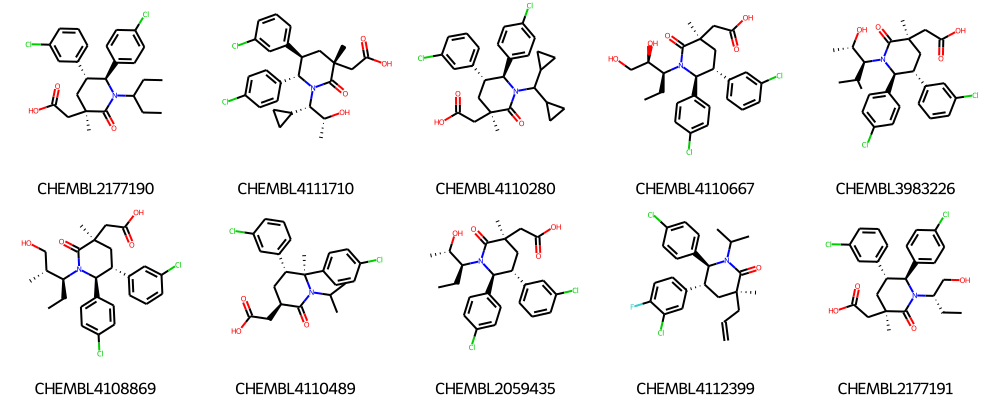

In [517]:
#Visualizing the clusters (10 examples from largest cluster)
print("Ten molecules from largest cluster:")
# Draw molecules
Draw.MolsToGridImage(
    [compounds[i][0] for i in clusters[0][:10]],
    legends=[compounds[i][1] for i in clusters[0][:10]],
    molsPerRow=5,
)


In [518]:
# Save molecules from largest cluster so other talktorials can use it
sdf_path = str(DATA / "molecule_set_largest_cluster.sdf")
sdf = Chem.SDWriter(sdf_path)
for index in clusters[0]:
    mol, label = compounds[index]
    # Add label to metadata
    mol.SetProp("_Name", label)
    sdf.write(mol)
sdf.close()

Ten molecules from second largest cluster:


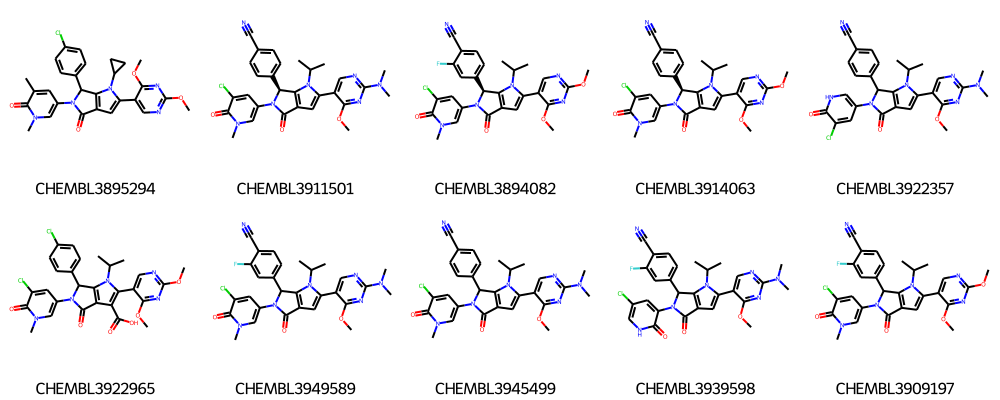

In [519]:
#10 examples from second largest cluster
print("Ten molecules from second largest cluster:")
# Draw molecules
Draw.MolsToGridImage(
    [compounds[i][0] for i in clusters[1][:10]],
    legends=[compounds[i][1] for i in clusters[1][:10]],
    molsPerRow=5,
)

Ten molecules from first 10 clusters:


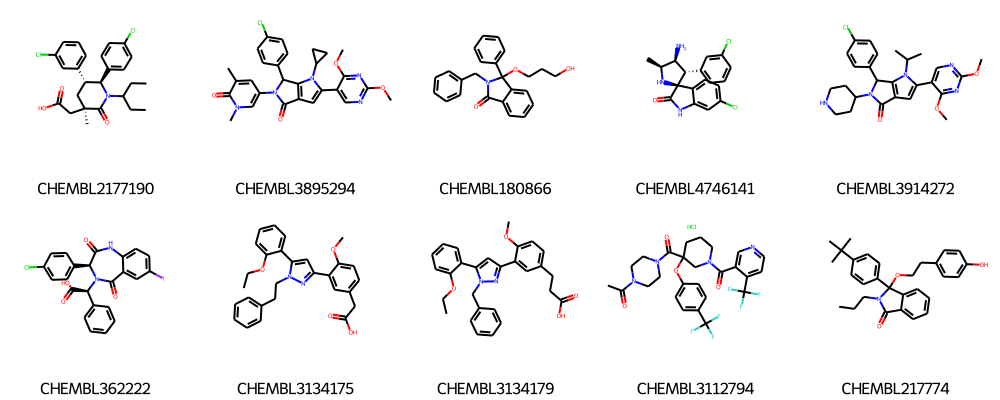

In [520]:
#Examples from first 10 clusters
print("Ten molecules from first 10 clusters:")
# Draw molecules
Draw.MolsToGridImage(
    [compounds[clusters[i][0]][0] for i in range(10)],
    legends=[compounds[clusters[i][0]][1] for i in range(10)],
    molsPerRow=5,
)

In [521]:
#Save cluster centers from first 3 clusters as SVG file
# Generate image
img = Draw.MolsToGridImage(
    [compounds[clusters[i][0]][0] for i in range(0, 3)],
    legends=[f"Cluster {i}" for i in range(1, 4)],
    subImgSize=(200, 200),
    useSVG=True,
)

# Patch RAW svg data: convert non-transparent to transparent background and set font size
molsvg = img.data.replace("opacity:1.0", "opacity:0.0").replace("12px", "20px")

# Save altered SVG data to file
with open(DATA / "cluster_representatives.svg", "w") as f:
    f.write(molsvg)

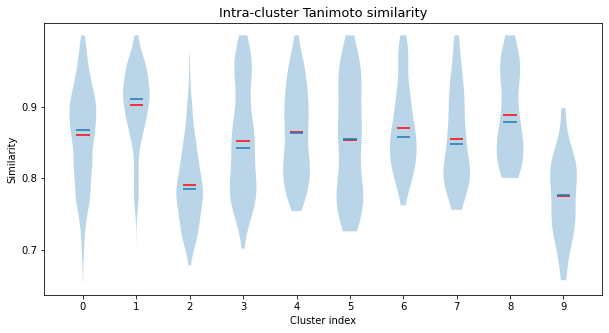

In [523]:
#Intra-cluster Tanimoto similarities
def intra_tanimoto(fps_clusters):
    """Function to compute Tanimoto similarity for all pairs of fingerprints in each cluster"""
    intra_similarity = []
    # Calculate intra similarity per cluster
    for cluster in fps_clusters:
        # Tanimoto distance matrix function converted to similarity matrix (1-distance)
        intra_similarity.append([1 - x for x in tanimoto_distance_matrix(cluster)])
    return intra_similarity
# Recompute fingerprints for 10 first clusters
mol_fps_per_cluster = []
for cluster in clusters[:10]:
    mol_fps_per_cluster.append([rdkit_gen.GetFingerprint(compounds[i][0]) for i in cluster])

# Compute intra-cluster similarity
intra_sim = intra_tanimoto(mol_fps_per_cluster)
# Violin plot with intra-cluster similarity

fig, ax = plt.subplots(figsize=(10, 5))
indices = list(range(10))
ax.set_xlabel("Cluster index")
ax.set_ylabel("Similarity")
ax.set_xticks(indices)
ax.set_xticklabels(indices)
ax.set_yticks(numpy.arange(0.6, 1.0, 0.1))
ax.set_title("Intra-cluster Tanimoto similarity", fontsize=13)
r = ax.violinplot(intra_sim, indices, showmeans=True, showmedians=True, showextrema=False)
r["cmeans"].set_color("red")
# mean=red, median=blue
# Save altered SVG data to file
fig.savefig('/Users/amankaushik/CDRI_Workshop/Aman_Analysis/data/plot_Intra-cluster_Tanimoto_similarities.pdf')

In [525]:
#Picking the final list of compounds
# Get the cluster center of each cluster (first molecule in each cluster)
cluster_centers = [compounds[c[0]] for c in clusters]
# How many cluster centers/clusters do we have?
print("Number of cluster centers:", len(cluster_centers))


Number of cluster centers: 89


In [526]:
#Sort clusters by size and molecules in each cluster by similarity
# Sort the molecules within a cluster based on their similarity
# to the cluster center and sort the clusters based on their size
sorted_clusters = []
for cluster in clusters:
    if len(cluster) <= 1:
        continue  # Singletons
    # else:
    # Compute fingerprints for each cluster element
    sorted_fingerprints = [rdkit_gen.GetFingerprint(compounds[i][0]) for i in cluster]
    # Similarity of all cluster members to the cluster center
    similarities = DataStructs.BulkTanimotoSimilarity(
        sorted_fingerprints[0], sorted_fingerprints[1:]
    )
    # Add index of the molecule to its similarity (centroid excluded!)
    similarities = list(zip(similarities, cluster[1:]))
    # Sort in descending order by similarity
    similarities.sort(reverse=True)
    # Save cluster size and index of molecules in clusters_sort
    sorted_clusters.append((len(similarities), [i for _, i in similarities]))
    # Sort in descending order by cluster size
    sorted_clusters.sort(reverse=True)

In [528]:
#Pick a maximum of 1000 compounds
# Count selected molecules, pick cluster centers first
selected_molecules = cluster_centers.copy()
# Take 10 molecules (or a maximum of 50%) of each cluster starting with the largest one
index = 0
pending = 1000 - len(selected_molecules)
while pending > 0 and index < len(sorted_clusters):
    # Take indices of sorted clusters
    tmp_cluster = sorted_clusters[index][1]
    # If the first cluster is > 10 big then take exactly 10 compounds
    if sorted_clusters[index][0] > 10:
        num_compounds = 10
    # If smaller, take half of the molecules
    else:
        num_compounds = int(0.5 * len(tmp_cluster)) + 1
    if num_compounds > pending:
        num_compounds = pending
    # Write picked molecules and their structures into list of lists called picked_fps
    selected_molecules += [compounds[i] for i in tmp_cluster[:num_compounds]]
    index += 1
    pending = 1000 - len(selected_molecules)
print("# Selected molecules:", len(selected_molecules))


# Selected molecules: 248


In [529]:
#we can play with the size of the dataset and see how the Butina clustering run time changes
# Reuse old dataset
sampled_mols = compounds.copy()

#Note that you can try out larger datasets, but data sizes larger than 10000 data points already start to consume quite some memory and time (that's why we stopped there).

# Helper function for time computation
def measure_runtime(sampled_mols):
    start_time = time.time()
    sampled_fingerprints = [rdkit_gen.GetFingerprint(m) for m, idx in sampled_mols]
    # Run the clustering with the dataset
    sampled_clusters = cluster_fingerprints(sampled_fingerprints, cutoff=0.3)
    return time.time() - start_time
len(sampled_mols)
# NBVAL_CHECK_OUTPUT
sample_sizes = [100, 500, 1000, 2000, 4000]
runtimes = []
# Take random samples with replacement
for size in sample_sizes:
    time_taken = measure_runtime(random.sample(sampled_mols, size))
    print(f"Dataset size {size}, time {time_taken:4.2f} seconds")
    runtimes.append(time_taken)
    

Dataset size 100, time 0.23 seconds


ValueError: Sample larger than population or is negative

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

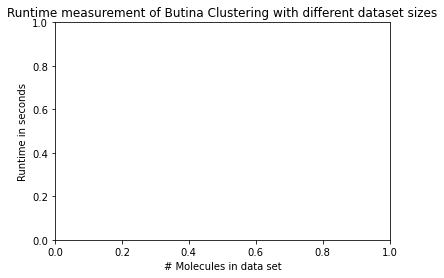

In [531]:
fig, ax = plt.subplots()
ax.set_title("Runtime measurement of Butina Clustering with different dataset sizes")
ax.set_xlabel("# Molecules in data set")
ax.set_ylabel("Runtime in seconds")
ax.plot(sample_sizes, runtimes, "g^");
# Save altered SVG data to file
fig.savefig('/Users/amankaushik/CDRI_Workshop/Aman_Analysis/data/plot_Butina_Clustering.pdf')


In [533]:
#Maximum common substructure (Mod 6)
from collections import defaultdict
from pathlib import Path
from copy import deepcopy
import random

from ipywidgets import interact, fixed, widgets
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, Geometry
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS
from rdkit.Chem import PandasTools

#from teachopencadd.utils import seed_everything

#seed_everything()

In [534]:
#Load and draw molecules
sdf = str(HERE / "/Users/amankaushik/CDRI_Workshop/Aman_Analysis/data/molecule_set_largest_cluster.sdf")
supplier = Chem.ForwardSDMolSupplier(sdf)
mols = list(supplier)

print(f"Set with {len(mols)} molecules loaded.")
# NBVAL_CHECK_OUTPUT

Set with 80 molecules loaded.


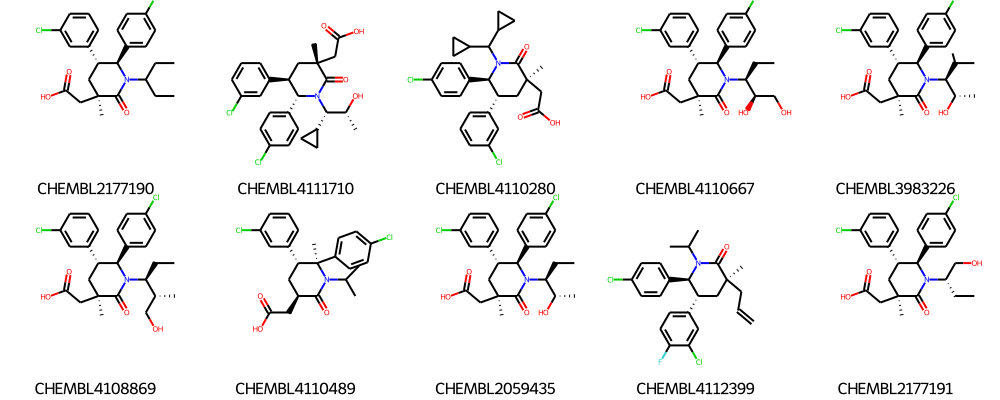

In [535]:
# Show only first 10 molecules -- use slicing
num_mols = 10
legends = [mol.GetProp("_Name") for mol in mols]
Draw.MolsToGridImage(mols[:num_mols], legends=legends[:num_mols], molsPerRow=5)

In [536]:
#Run the FMCS algorithm with different input parameters
mcs1 = rdFMCS.FindMCS(mols)
print(f"MCS1 contains {mcs1.numAtoms} atoms and {mcs1.numBonds} bonds.")
print("MCS SMARTS string:", mcs1.smartsString)
# NBVAL_CHECK_OUTPUT

MCS1 contains 23 atoms and 25 bonds.
MCS SMARTS string: [#6]-[#6]-[#7]1-[#6](=[#8])-[#6]-[#6]-[#6](-[#6]-1-[#6]1:[#6]:[#6]:[#6](:[#6]:[#6]:1)-[#17])-[#6]1:[#6]:[#6]:[#6]:[#6](:[#6]:1)-[#17]


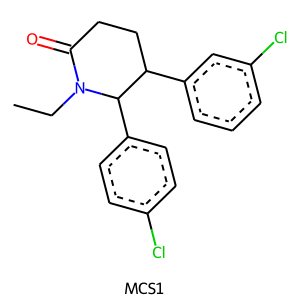

In [537]:
# Draw substructure from Smarts
m1 = Chem.MolFromSmarts(mcs1.smartsString)
Draw.MolToImage(m1, legend="MCS1")


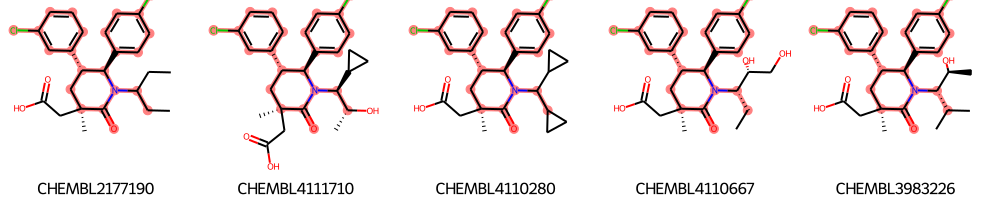

In [538]:
#Define a helper function to draw the molecules with the highlighted MCS
def highlight_molecules(molecules, mcs, number, label=True, same_orientation=True, **kwargs):
    """Highlight the MCS in our query molecules"""
    molecules = deepcopy(molecules)
    # convert MCS to molecule
    pattern = Chem.MolFromSmarts(mcs.smartsString)
    # find the matching atoms in each molecule
    matching = [molecule.GetSubstructMatch(pattern) for molecule in molecules[:number]]

    legends = None
    if label is True:
        legends = [x.GetProp("_Name") for x in molecules]

    # Align by matched substructure so they are depicted in the same orientation
    # Adapted from: https://gist.github.com/greglandrum/82d9a86acb3b00d3bb1df502779a5810
    if same_orientation:
        mol, match = molecules[0], matching[0]
        AllChem.Compute2DCoords(mol)
        coords = [mol.GetConformer().GetAtomPosition(x) for x in match]
        coords2D = [Geometry.Point2D(pt.x, pt.y) for pt in coords]
        for mol, match in zip(molecules[1:number], matching[1:number]):
            if not match:
                continue
            coord_dict = {match[i]: coord for i, coord in enumerate(coords2D)}
            AllChem.Compute2DCoords(mol, coordMap=coord_dict)

    return Draw.MolsToGridImage(
        molecules[:number],
        legends=legends,
        molsPerRow=5,
        highlightAtomLists=matching[:number],
        subImgSize=(200, 200),
        **kwargs,
    )
highlight_molecules(mols, mcs1, 5)


In [539]:
#Save image to disk
img = highlight_molecules(mols, mcs1, 3, useSVG=True)

# Get SVG data
molsvg = img.data

# Set background to transparent & Enlarge size of label
molsvg = molsvg.replace("opacity:1.0", "opacity:0.0").replace("12px", "20px")

# Save altered SVG data to file
with open(DATA / "mcs_largest_cluster.svg", "w") as f:
    f.write(molsvg)

In [540]:
#Set a threshold
mcs2 = rdFMCS.FindMCS(mols, threshold=0.8)
print(f"MCS2 contains {mcs2.numAtoms} atoms and {mcs2.numBonds} bonds.")
print("SMARTS string:", mcs2.smartsString)
# NBVAL_CHECK_OUTPUT

MCS2 contains 26 atoms and 28 bonds.
SMARTS string: [#6]-[#6]-[#6]-[#7]1-[#6](=[#8])-[#6](-[#6]-[#6])-[#6]-[#6](-[#6]-1-[#6]1:[#6]:[#6]:[#6](:[#6]:[#6]:1)-[#17])-[#6]1:[#6]:[#6]:[#6]:[#6](:[#6]:1)-[#17]


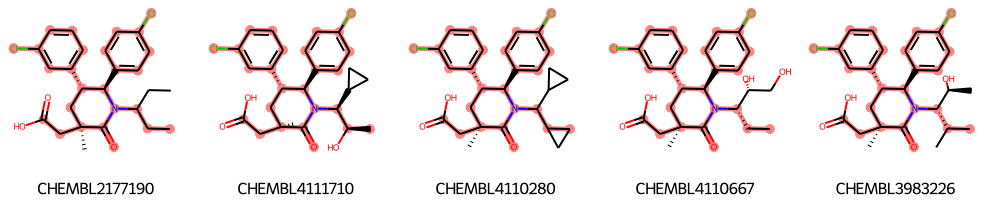

In [543]:
# Draw substructure
m2 = Chem.MolFromSmarts(mcs2.smartsString)
Draw.MolsToGridImage([m1, m2], legends=["MCS1", "MCS2: +threshold=0.8"])
highlight_molecules(mols, mcs2, 5)


In [544]:
#Match ring bonds
mcs3 = rdFMCS.FindMCS(mols, threshold=0.8, ringMatchesRingOnly=True)
print(f"MCS3 contains {mcs3.numAtoms} atoms and {mcs3.numBonds} bonds.")
print("SMARTS string:", mcs3.smartsString)
# NBVAL_CHECK_OUTPUT

MCS3 contains 24 atoms and 26 bonds.
SMARTS string: [#6&!R]-&!@[#7&R]1-&@[#6&R](=&!@[#8&!R])-&@[#6&R](-&!@[#6&!R]-&!@[#6&!R])-&@[#6&R]-&@[#6&R](-&@[#6&R]-&@1-&!@[#6&R]1:&@[#6&R]:&@[#6&R]:&@[#6&R](:&@[#6&R]:&@[#6&R]:&@1)-&!@[#17&!R])-&!@[#6&R]1:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R](:&@[#6&R]:&@1)-&!@[#17&!R]


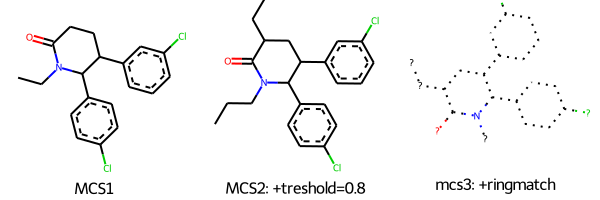

In [546]:
# Draw substructure
m3 = Chem.MolFromSmarts(mcs3.smartsString)
Draw.MolsToGridImage([m1, m2, m3], legends=["MCS1", "MCS2: +treshold=0.8", "mcs3: +ringmatch"])


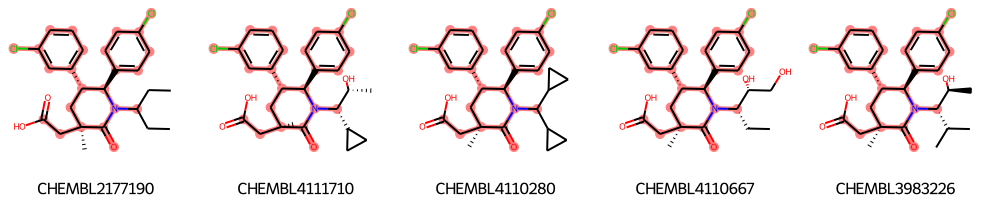

In [548]:
highlight_molecules(mols, mcs3, 5)


In [549]:
#A more diverse set: the Target compounds downloaded from ChEMBL
#We restrict the data to only highly active molecules (pIC50>9) and detect the maximum common scaffold in this subset
# Read full EGFR data
mol_df = pd.read_csv(HERE / "/Users/amankaushik/CDRI_Workshop/Aman_Analysis/data/TP53_compounds.csv", index_col=0)
print("Total number of compounds:", mol_df.shape[0])

# Only keep molecules with pIC50 > 9 (IC50 > 1nM)
mol_df = mol_df[mol_df.pIC50 > 9]
print("Number of compounds with pIC50 > 9:", mol_df.shape[0])
# NBVAL_CHECK_OUTPUT

Total number of compounds: 1224
Number of compounds with pIC50 > 9: 258


In [550]:
# Add molecule column to data frame
PandasTools.AddMoleculeColumnToFrame(mol_df, "smiles")
mol_df.head(3)

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

  molecule_chembl_id   IC50 units  \
0      CHEMBL3892862  0.061    nM   
1      CHEMBL3901716  0.065    nM   
2      CHEMBL3945756  0.068    nM   

                                              smiles      pIC50  \
0  COc1ccc(CC(=O)O)cc1-c1cc2c(n1C(C)C)[C@H](c1ccc...  10.214670   
1  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(Cl)cc2)N(c...  10.187087   
2  COc1ncc(-c2cc3c(n2C(C)C)C(c2ccc(Cl)cc2)N(c2cc(...  10.167491   

                                               ROMol  
0  <img data-content="rdkit/molecule" src="data:i...  
1  <img data-content="rdkit/molecule" src="data:i...  
2  <img data-content="rdkit/molecule" src="data:i...  

In [551]:
#We do our calculations on the selected highly active molecules only
mols_diverse = []
# Note: discarded variables we do not care about are usually referred to with a single underscore
for _, row in mol_df.iterrows():
    m = Chem.MolFromSmiles(row.smiles)
    m.SetProp("_Name", row.molecule_chembl_id)
    mols_diverse.append(m)

#In the interest of time, we randomly pick 50 molecules from this set.

# We have fixed the random seed above (imports) for deterministic results
mols_diverse_sample = random.sample(mols_diverse, 50)

#We now calculate the same three variants of MCSs as described above and draw the respective substructures. We use a slightly lower threshold to account for the larger diversity in the set.

threshold_diverse = 0.7
mcs1 = rdFMCS.FindMCS(mols_diverse_sample)
print("SMARTS string1:", mcs1.smartsString)
mcs2 = rdFMCS.FindMCS(mols_diverse_sample, threshold=threshold_diverse)
print("SMARTS string2:", mcs2.smartsString)
mcs3 = rdFMCS.FindMCS(mols_diverse_sample, ringMatchesRingOnly=True, threshold=threshold_diverse)
print("SMARTS string3:", mcs3.smartsString)
# NBVAL_CHECK_OUTPUT

SMARTS string1: [#6]-,:[#6]-,:[#6](-,:[#6])-[#7](-[#6](=[#8])-[#6](-,:[#6])-,:[#6]-,:[#6]-[#6](:[#6]):[#6])-[#6]-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1
SMARTS string2: [#6]-,:[#6]-,:[#6](-,:[#6])-[#7](-[#6](=[#8])-[#6](-,:[#6])-,:[#6]-,:[#6]-[#6](:[#6]):[#6])-[#6]-[#6]1:[#6]:[#6]:[#6](:[#6]:[#6]:1)-[#17]
SMARTS string3: [#7&R](-&@[#6&R](=&!@[#8&!R])-&@[#6&R]-,:;@[#6&R]-,:;@[#6&R]-&!@[#6&R](:&@[#6&R]):&@[#6&R])-&@[#6&R]-&!@[#6&R]1:&@[#6&R]:&@[#6&R]:&@[#6&R](:&@[#6&R]:&@[#6&R]:&@1)-&!@[#17&!R]


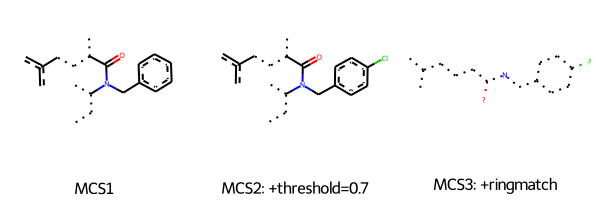

In [552]:
# Draw substructures
m1 = Chem.MolFromSmarts(mcs1.smartsString)
m2 = Chem.MolFromSmarts(mcs2.smartsString)
m3 = Chem.MolFromSmarts(mcs3.smartsString)

Draw.MolsToGridImage(
    [m1, m2, m3],
    legends=[
        "MCS1",
        f"MCS2: +threshold={threshold_diverse}",
        "MCS3: +ringmatch",
    ],
)

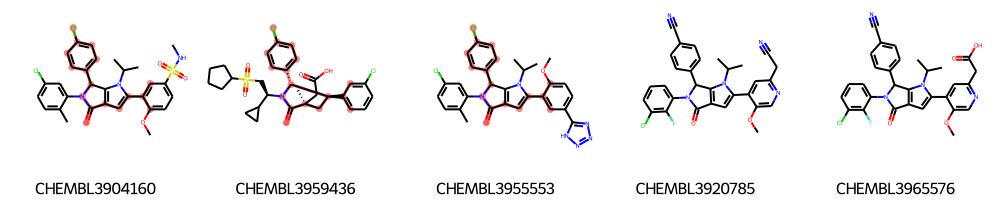

In [556]:
highlight_molecules(mols_diverse_sample, mcs3, 5)

In [557]:
#Identification of MCS using interactive cut-off adaption
def render_mcs(molecules, percentage):
    """Interactive widget helper. `molecules` must be wrapped in `ipywidgets.fixed()`,
    while `percentage` will be determined by an IntSlider widget."""
    tmcs = rdFMCS.FindMCS(molecules, threshold=percentage / 100.0)
    if tmcs is None:
        print("No MCS found")
        return None

    m = Chem.MolFromSmarts(tmcs.smartsString)
    print(tmcs.smartsString)
    return m
# Note that the slider may take a few seconds to react
interact(
    render_mcs,
    molecules=fixed(mols_diverse_sample),
    percentage=widgets.IntSlider(min=0, max=100, step=10, value=70),
);

interactive(children=(IntSlider(value=70, description='percentage', step=10), Output()), _dom_classes=('widget…

In [558]:
#Mod7
#Ligand-based screening: machine learning
from pathlib import Path
from warnings import filterwarnings
import time

import pandas as pd
import numpy as np
from sklearn import svm, metrics, clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import auc, accuracy_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect

#from teachopencadd.utils import seed_everything

# Silence some expected warnings
filterwarnings("ignore")
# Fix seed for reproducible results
SEED = 22
#seed_everything(SEED)


In [559]:
#Load compound and activity data
# Read data from previous talktorials
chembl_df = pd.read_csv(
    HERE / "/Users/amankaushik/CDRI_Workshop/Aman_Analysis/data/TP53_compounds_lipinski.csv",
    index_col=0,
)

# Look at head
print("Shape of dataframe : ", chembl_df.shape)
chembl_df.head()
# NBVAL_CHECK_OUTPUT

Shape of dataframe :  (440, 10)


AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

   molecule_chembl_id   IC50 units  \
3       CHEMBL3911501  0.069    nM   
17      CHEMBL3318767  0.100    nM   
37      CHEMBL3894082  0.107    nM   
38      CHEMBL3914063  0.108    nM   
47      CHEMBL3922357  0.131    nM   

                                               smiles      pIC50  \
3   COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)[C@H](c1ccc(C...  10.161151   
17  C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2cc...  10.000000   
37  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)c(F)c2...   9.970616   
38  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)cc2)N(...   9.966576   
47  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)C(c1ccc(C#N)c...   9.882729   

    molecular_weight  n_hba  n_hbd     logp  ro5_fulfilled  
3         557.194215      9      0  4.57418           True  
17        608.151463      5      1  4.97220           True  
37        562.153159      9      0  4.65588           True  
38        544.162581      9      0  4.51678           True  
47        543.178565      8      1  4.56378           Tru

In [560]:
# Keep only the columns we want
chembl_df = chembl_df[["molecule_chembl_id", "smiles", "pIC50"]]
chembl_df.head()
# NBVAL_CHECK_OUTPUT

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

   molecule_chembl_id                                             smiles  \
3       CHEMBL3911501  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)[C@H](c1ccc(C...   
17      CHEMBL3318767  C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2cc...   
37      CHEMBL3894082  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)c(F)c2...   
38      CHEMBL3914063  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)cc2)N(...   
47      CHEMBL3922357  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)C(c1ccc(C#N)c...   

        pIC50  
3   10.161151  
17  10.000000  
37   9.970616  
38   9.966576  
47   9.882729  

In [561]:
#Data preparation
#Data labeling
# Add column for activity
chembl_df["active"] = np.zeros(len(chembl_df))

# Mark every molecule as active with an pIC50 of >= 6.3, 0 otherwise
chembl_df.loc[chembl_df[chembl_df.pIC50 >= 6.3].index, "active"] = 1.0

# NBVAL_CHECK_OUTPUT
print("Number of active compounds:", int(chembl_df.active.sum()))
print("Number of inactive compounds:", len(chembl_df) - int(chembl_df.active.sum()))

Number of active compounds: 203
Number of inactive compounds: 237


In [562]:
chembl_df.head()
# NBVAL_CHECK_OUTPUT

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

   molecule_chembl_id                                             smiles  \
3       CHEMBL3911501  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)[C@H](c1ccc(C...   
17      CHEMBL3318767  C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2cc...   
37      CHEMBL3894082  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)c(F)c2...   
38      CHEMBL3914063  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)cc2)N(...   
47      CHEMBL3922357  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)C(c1ccc(C#N)c...   

        pIC50  active  
3   10.161151     1.0  
17  10.000000     1.0  
37   9.970616     1.0  
38   9.966576     1.0  
47   9.882729     1.0  

In [563]:
#Molecule encoding
def smiles_to_fp(smiles, method="maccs", n_bits=2048):
    """
    Encode a molecule from a SMILES string into a fingerprint.

    Parameters
    ----------
    smiles : str
        The SMILES string defining the molecule.

    method : str
        The type of fingerprint to use. Default is MACCS keys.

    n_bits : int
        The length of the fingerprint.

    Returns
    -------
    array
        The fingerprint array.

    """

    # convert smiles to RDKit mol object
    mol = Chem.MolFromSmiles(smiles)

    if method == "maccs":
        return np.array(MACCSkeys.GenMACCSKeys(mol))
    if method == "morgan2":
        return np.array(GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits))
    if method == "morgan3":
        return np.array(GetMorganFingerprintAsBitVect(mol, 3, nBits=n_bits))
    else:
        # NBVAL_CHECK_OUTPUT
        print(f"Warning: Wrong method specified: {method}. Default will be used instead.")
        return np.array(MACCSkeys.GenMACCSKeys(mol))
compound_df = chembl_df.copy()
# Add column for fingerprint
compound_df["fp"] = compound_df["smiles"].apply(smiles_to_fp)
compound_df.head(3)
# NBVAL_CHECK_OUTPUT

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

   molecule_chembl_id                                             smiles  \
3       CHEMBL3911501  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)[C@H](c1ccc(C...   
17      CHEMBL3318767  C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2cc...   
37      CHEMBL3894082  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)c(F)c2...   

        pIC50  active                                                 fp  
3   10.161151     1.0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
17  10.000000     1.0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
37   9.970616     1.0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

In [564]:
#Machine Learning (ML)
#In the following, we will try several ML approaches to classify our molecules. We will use:

#Random Forest (RF)
#Support Vector Machine (SVM)
#Artificial Neural Network (ANN)
def plot_roc_curves_for_models(models, test_x, test_y, save_png=False):
    """
    Helper function to plot customized roc curve.

    Parameters
    ----------
    models: dict
        Dictionary of pretrained machine learning models.
    test_x: list
        Molecular fingerprints for test set.
    test_y: list
        Associated activity labels for test set.
    save_png: bool
        Save image to disk (default = False)

    Returns
    -------
    fig:
        Figure.
    """

    fig, ax = plt.subplots()

    # Below for loop iterates through your models list
    for model in models:
        # Select the model
        ml_model = model["model"]
        # Prediction probability on test set
        test_prob = ml_model.predict_proba(test_x)[:, 1]
        # Prediction class on test set
        test_pred = ml_model.predict(test_x)
        # Compute False postive rate and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(test_y, test_prob)
        # Calculate Area under the curve to display on the plot
        auc = roc_auc_score(test_y, test_prob)
        # Plot the computed values
        ax.plot(fpr, tpr, label=(f"{model['label']} AUC area = {auc:.2f}"))

    # Custom settings for the plot
    ax.plot([0, 1], [0, 1], "r--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("Receiver Operating Characteristic")
    ax.legend(loc="lower right")
    # Save plot
    if save_png:
        fig.savefig(f"{DATA}/roc_auc", dpi=300, bbox_inches="tight", transparent=True)
    return fig

In [565]:
#Helper function to calculate model performance.

def model_performance(ml_model, test_x, test_y, verbose=True):
    """
    Helper function to calculate model performance

    Parameters
    ----------
    ml_model: sklearn model object
        The machine learning model to train.
    test_x: list
        Molecular fingerprints for test set.
    test_y: list
        Associated activity labels for test set.
    verbose: bool
        Print performance measure (default = True)

    Returns
    -------
    tuple:
        Accuracy, sensitivity, specificity, auc on test set.
    """

    # Prediction probability on test set
    test_prob = ml_model.predict_proba(test_x)[:, 1]

    # Prediction class on test set
    test_pred = ml_model.predict(test_x)

    # Performance of model on test set
    accuracy = accuracy_score(test_y, test_pred)
    sens = recall_score(test_y, test_pred)
    spec = recall_score(test_y, test_pred, pos_label=0)
    auc = roc_auc_score(test_y, test_prob)

    if verbose:
        # Print performance results
        # NBVAL_CHECK_OUTPUT        print(f"Accuracy: {accuracy:.2}")
        print(f"Sensitivity: {sens:.2f}")
        print(f"Specificity: {spec:.2f}")
        print(f"AUC: {auc:.2f}")

    return accuracy, sens, spec, auc

In [566]:
#Helper function to fit a machine learning model on a random train-test split of the data and return the performance measures.

def model_training_and_validation(ml_model, name, splits, verbose=True):
    """
    Fit a machine learning model on a random train-test split of the data
    and return the performance measures.

    Parameters
    ----------
    ml_model: sklearn model object
        The machine learning model to train.
    name: str
        Name of machine learning algorithm: RF, SVM, ANN
    splits: list
        List of desciptor and label data: train_x, test_x, train_y, test_y.
    verbose: bool
        Print performance info (default = True)

    Returns
    -------
    tuple:
        Accuracy, sensitivity, specificity, auc on test set.

    """
    train_x, test_x, train_y, test_y = splits

    # Fit the model
    ml_model.fit(train_x, train_y)

    # Calculate model performance results
    accuracy, sens, spec, auc = model_performance(ml_model, test_x, test_y, verbose)

    return accuracy, sens, spec, auc

In [567]:
#Preprocessing: Split the data (will be reused for the other models)

fingerprint_to_model = compound_df.fp.tolist()
label_to_model = compound_df.active.tolist()

# Split data randomly in train and test set
# note that we use test/train_x for the respective fingerprint splits
# and test/train_y for the respective label splits
(
    static_train_x,
    static_test_x,
    static_train_y,
    static_test_y,
) = train_test_split(fingerprint_to_model, label_to_model, test_size=0.2, random_state=SEED)
splits = [static_train_x, static_test_x, static_train_y, static_test_y]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x))
print("Test data size:", len(static_test_x))

Training data size: 352
Test data size: 88


In [568]:
#Random forest classifier
# Set model parameter for random forest
param = {
    "n_estimators": 100,  # number of trees to grows
    "criterion": "entropy",  # cost function to be optimized for a split
}
model_RF = RandomForestClassifier(**param)
# Fit model on single split
performance_measures = model_training_and_validation(model_RF, "RF", splits)

Sensitivity: 0.97
Specificity: 0.86
AUC: 0.96


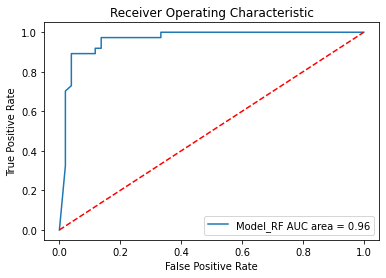

In [569]:
# Initialize the list that stores all models. First one is RF.
models = [{"label": "Model_RF", "model": model_RF}]
# Plot roc curve
plot_roc_curves_for_models(models, static_test_x, static_test_y);

In [570]:
#Support vector classifier
# Specify model
model_SVM = svm.SVC(kernel="rbf", C=1, gamma=0.1, probability=True)

# Fit model on single split
performance_measures = model_training_and_validation(model_SVM, "SVM", splits)

Sensitivity: 0.97
Specificity: 0.86
AUC: 0.96


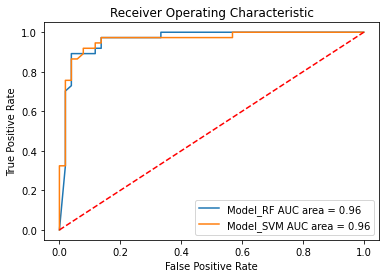

In [571]:
# Append SVM model
models.append({"label": "Model_SVM", "model": model_SVM})
# Plot roc curve
plot_roc_curves_for_models(models, static_test_x, static_test_y);

In [572]:
#Neural network classifier
# Specify model
model_ANN = MLPClassifier(hidden_layer_sizes=(5, 3), random_state=SEED)

# Fit model on single split
performance_measures = model_training_and_validation(model_ANN, "ANN", splits)

Sensitivity: 0.89
Specificity: 0.88
AUC: 0.93


TypeError: write() argument must be str, not function

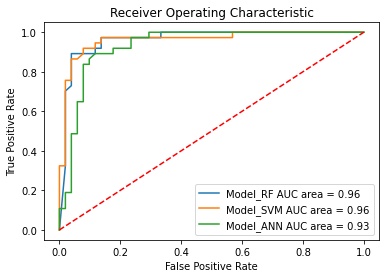

In [573]:
# Append ANN model
models.append({"label": "Model_ANN", "model": model_ANN})
# Plot roc curve
plot_roc_curves_for_models(models, static_test_x, static_test_y, True);
# Save altered SVG data to file
with open(DATA / "plot_roc_curves_for_models.svg", "w") as f:
    f.write(plot_roc_curves_for_models)

In [574]:
#Cross-validation
#Next, we will perform cross-validation experiments with the three different models. Therefore, we define a helper function for machine learning model training and validation in a cross-validation loop
def crossvalidation(ml_model, df, n_folds=5, verbose=False):
    """
    Machine learning model training and validation in a cross-validation loop.

    Parameters
    ----------
    ml_model: sklearn model object
        The machine learning model to train.
    df: pd.DataFrame
        Data set with SMILES and their associated activity labels.
    n_folds: int, optional
        Number of folds for cross-validation.
    verbose: bool, optional
        Performance measures are printed.

    Returns
    -------
    None

    """
    t0 = time.time()
    # Shuffle the indices for the k-fold cross-validation
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=SEED)

    # Results for each of the cross-validation folds
    acc_per_fold = []
    sens_per_fold = []
    spec_per_fold = []
    auc_per_fold = []

    # Loop over the folds
    for train_index, test_index in kf.split(df):
        # clone model -- we want a fresh copy per fold!
        fold_model = clone(ml_model)
        # Training

        # Convert the fingerprint and the label to a list
        train_x = df.iloc[train_index].fp.tolist()
        train_y = df.iloc[train_index].active.tolist()

        # Fit the model
        fold_model.fit(train_x, train_y)

        # Testing

        # Convert the fingerprint and the label to a list
        test_x = df.iloc[test_index].fp.tolist()
        test_y = df.iloc[test_index].active.tolist()

        # Performance for each fold
        accuracy, sens, spec, auc = model_performance(fold_model, test_x, test_y, verbose)

        # Save results
        acc_per_fold.append(accuracy)
        sens_per_fold.append(sens)
        spec_per_fold.append(spec)
        auc_per_fold.append(auc)

    # Print statistics of results
    print(
        f"Mean accuracy: {np.mean(acc_per_fold):.2f} \t"
        f"and std : {np.std(acc_per_fold):.2f} \n"
        f"Mean sensitivity: {np.mean(sens_per_fold):.2f} \t"
        f"and std : {np.std(sens_per_fold):.2f} \n"
        f"Mean specificity: {np.mean(spec_per_fold):.2f} \t"
        f"and std : {np.std(spec_per_fold):.2f} \n"
        f"Mean AUC: {np.mean(auc_per_fold):.2f} \t"
        f"and std : {np.std(auc_per_fold):.2f} \n"
        f"Time taken : {time.time() - t0:.2f}s\n"
    )

    return acc_per_fold, sens_per_fold, spec_per_fold, auc_per_fold

In [575]:
N_FOLDS = 3

#Note: Next cell takes long to execute

for model in models:
    print("\n======= ")
    print(f"{model['label']}")
    crossvalidation(model["model"], compound_df, n_folds=N_FOLDS)



Model_RF
Mean accuracy: 0.90 	and std : 0.01 
Mean sensitivity: 0.91 	and std : 0.04 
Mean specificity: 0.90 	and std : 0.03 
Mean AUC: 0.95 	and std : 0.00 
Time taken : 0.76s


Model_SVM
Mean accuracy: 0.89 	and std : 0.02 
Mean sensitivity: 0.89 	and std : 0.04 
Mean specificity: 0.89 	and std : 0.04 
Mean AUC: 0.95 	and std : 0.01 
Time taken : 0.21s


Model_ANN
Mean accuracy: 0.88 	and std : 0.01 
Mean sensitivity: 0.88 	and std : 0.02 
Mean specificity: 0.88 	and std : 0.01 
Mean AUC: 0.94 	and std : 0.02 
Time taken : 1.41s



In [576]:
#We look at the cross-validation performance for molecules encoded using Morgan fingerprint and not MACCS keys
# Reset data frame
compound_df = chembl_df.copy()
# Use Morgan fingerprint with radius 3
compound_df["fp"] = compound_df["smiles"].apply(smiles_to_fp, args=("morgan3",))
compound_df.head(3)
# NBVAL_CHECK_OUTPUT

AttributeError: module 'pandas.io.formats.format' has no attribute '_get_adjustment'

   molecule_chembl_id                                             smiles  \
3       CHEMBL3911501  COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)[C@H](c1ccc(C...   
17      CHEMBL3318767  C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2cc...   
37      CHEMBL3894082  COc1ncc(-c2cc3c(n2C(C)C)[C@H](c2ccc(C#N)c(F)c2...   

        pIC50  active                                                 fp  
3   10.161151     1.0  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
17  10.000000     1.0  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
37   9.970616     1.0  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

In [577]:
#Next cell takes long to execute
for model in models:
    if model["label"] == "Model_SVM":
        # SVM is super slow with long fingerprints
        # and will have a performance similar to RF
        # We can skip it in this test, but if you want
        # to run it, feel free to replace `continue` with `pass`
        continue
    print("\n=======")
    print(model["label"])
    crossvalidation(model["model"], compound_df, n_folds=N_FOLDS)


Model_RF
Mean accuracy: 0.91 	and std : 0.01 
Mean sensitivity: 0.87 	and std : 0.05 
Mean specificity: 0.94 	and std : 0.03 
Mean AUC: 0.97 	and std : 0.01 
Time taken : 1.00s


Model_ANN
Mean accuracy: 0.90 	and std : 0.01 
Mean sensitivity: 0.88 	and std : 0.04 
Mean specificity: 0.92 	and std : 0.02 
Mean AUC: 0.96 	and std : 0.00 
Time taken : 2.42s

